<a href="https://colab.research.google.com/github/drpetros11111/TensorFlow/blob/CNN_withTensorflow_keras/03_convolutional_neural_networks_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. Convolutional Neural Networks and Computer Vision with TensorFlow

So far we've covered the basics of TensorFlow and built a handful of models to work across different problems.

Now we're going to get specific and see how a special kind of neural network, [convolutional neural networks (CNNs)](https://en.wikipedia.org/wiki/Convolutional_neural_network) can be used for computer vision (detecting patterns in visual data).

> 🔑 **Note:** In deep learning, many different kinds of model architectures can be used for different problems. For example, you could use a convolutional neural network for making predictions on image data and/or text data. However, in practice some architectures typically work better than others.

For example, you might want to:
* Classify whether a picture of food contains pizza 🍕 or steak 🥩 (we're going to do this)
* Detect whether or not an object appears in an image (e.g. did a specific car pass through a security camera?)

In this notebook, we're going to follow the TensorFlow modelling workflow we've been following so far whilst learning about how to build and use CNNs.

## What we're going to cover

Specifically, we're going to go through the follow with TensorFlow:

- Getting a dataset to work with
- Architecture of a convolutional neural network
- A quick end-to-end example (what we're working towards)
- Steps in modelling for binary image classification with CNNs
  - Becoming one with the data
  - Preparing data for modelling
  - Creating a CNN model (starting with a baseline)
  - Fitting a model (getting it to find patterns in our data)
  - Evaluating a model
  - Improving a model
  - Making a prediction with a trained model
- Steps in modelling for multi-class image classification with CNNs
 - Same as above (but this time with a different dataset)

## How you can use this notebook

You can read through the descriptions and the code (it should all run, except for the cells which error on purpose), but there's a better option.

Write all of the code yourself.

Yes. I'm serious. Create a new notebook, and rewrite each line by yourself. Investigate it, see if you can break it, why does it break?

You don't have to write the text descriptions but writing the code yourself is a great way to get hands-on experience.

Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to **write more code**.

In [ ]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-08-25 17:20:35.055132


#Get the data

Because convolutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

The images we're going to work with are from the [Food-101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/), a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

##To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

> 🔑 **Note:** To prepare the data we're using, preprocessing steps such as, moving the images into different subset folders, have been done. To see these preprocessing steps check out [the preprocessing notebook](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb).

We'll download the `pizza_steak` subset .zip file and unzip it.

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-08-25 17:20:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   266MB/s    in 0.4s    

2024-08-25 17:20:37 (266 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



> 🔑 **Note:** If you're using Google Colab and your runtime disconnects, you may have to redownload the files. You can do this by rerunning the cell above.

#Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you're working with.

Wtih this being said, let's inspect the data we just downloaded.

The file structure has been formatted to be in a typical format you might use for working with images.

More specifically:
* A `train` directory which contains all of the images in the training dataset with subdirectories each named after a certain class containing images of that class.
* A `test` directory with the same structure as the `train` directory.

```
Example of file structure

pizza_steak <- top level folder
└───train <- training images
│   └───pizza
│   │   │   1008104.jpg
│   │   │   1638227.jpg
│   │   │   ...      
│   └───steak
│       │   1000205.jpg
│       │   1647351.jpg
│       │   ...
│   
└───test <- testing images
│   └───pizza
│   │   │   1001116.jpg
│   │   │   1507019.jpg
│   │   │   ...      
│   └───steak
│       │   100274.jpg
│       │   1653815.jpg
│       │   ...    
 ```

Let's inspect each of the directories we've downloaded.

To so do, we can use the command `ls` which stands for list.

In [ ]:
!ls pizza_steak

test  train


We can see we've got a `train` and `test` folder.

Let's see what's inside one of them.

In [ ]:
!ls pizza_steak/train/

pizza  steak


And how about insde the `steak` directory?

In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

Woah, a whole bunch of images. But how many?

> 🛠 **Practice:** Try listing the same information for the `pizza` directory in the `test` folder.

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


# Organizating the Data in Directories, sub-Directories and files
This code snippet is used to traverse through the pizza_steak directory (and its subdirectories) and print out the number of subdirectories and image files at each level of the directory hierarchy. Here's a detailed explanation:


---

##Importing the os Module:
    import os
The os module in Python provides functions for interacting with the operating system, including functions to navigate the file system.

-----------
##Walking Through the Directory:

    for dirpath, dirnames, filenames in os.walk("pizza_steak"):

###os.walk("pizza_steak"):

This function generates the file names in a directory tree by walking either top-down or bottom-up through the directory.


###dirpath:
The current directory path being traversed.

###dirnames:

A list of names of the subdirectories in the current dirpath.

###filenames:

A list of the names of the non-directory files in the current dirpath.

The for loop iterates over each directory and its contents, as returned by os.walk.

--------------
##Printing Information:

    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
###len(dirnames):

This gives the number of subdirectories in the current directory (dirpath).

###len(filenames):

This gives the number of files (e.g., images) in the current directory (dirpath).

-------
##Formatted String:

The print statement outputs a formatted string that provides the number of subdirectories and files at each level of the directory structure.

-------------
------------
#What the Code Does
Directory Traversal: The code systematically traverses through each directory and subdirectory within the pizza_steak directory.

Counting Files and Directories: For each directory (including subdirectories), it counts how many subdirectories (dirnames) and how many files (filenames) are present.

Output: The code prints out a summary for each directory it visits, showing the directory path (dirpath), the number of subdirectories (dirnames), and the number of files (filenames).

--------------------------
#Example Output
Assume the pizza_steak directory has the following structure:

bash
Copy code

    pizza_steak/
        ├── train/
        │   ├── pizza/
        │   │   ├── pizza1.jpg
        │   │   ├── pizza2.jpg
        │   │   └── ...
        │   └── steak/
        │       ├── steak1.jpg
        │       ├── steak2.jpg
        │       └── ...,,.......10
        └── test/
           ├── pizza/
           ├── steak/

The output might look something like this:

    There are 2 directories and 0 images in 'pizza_steak'.
    There are 2 directories and 0 images in 'pizza_steak/train'.
    There are 0 directories and 10 images in 'pizza_steak/train/pizza'.
    There are 0 directories and 8 images in 'pizza_steak/train/steak'.
    There are 2 directories and 0 images in 'pizza_steak/test'.
    There are 0 directories and 3 images in 'pizza_steak/test/pizza'.
    There are 0 directories and 2 images in 'pizza_steak/test/steak'.

------------
#Summary
Purpose: The code is used to explore and report on the structure of the pizza_steak directory, specifically the number of subdirectories and image files in each directory.

Usage: This is useful for understanding the layout of a dataset and ensuring that files are organized correctly before processing or training a model.







In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

# Directly Listing & Counting the files of a sub-Directory
The code snippet you've provided is used to count the number of image files (or files in general) in the steak subdirectory under the train directory within the pizza_steak folder. Here's how it works:


---


    os.listdir("pizza_steak/train/steak"):

##The os.listdir()

function returns a list of all entries (files and directories) in the specified directory.

In this case, "pizza_steak/train/steak" is the path to the steak subdirectory under the train directory.

This list will contain the names of all files and subdirectories within the steak folder.

--------------------
    len(os.listdir("pizza_steak/train/steak")):

##len()

is a function that returns the number of items in a list.

By applying len() to the list returned by os.listdir(), you are effectively counting the number of files and subdirectories in "pizza_steak/train/steak".

Assuming this directory contains only images, this will give you the number of steak images used for training.

--------------------
##Storing the Result:

    num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

The count is stored in the variable num_steak_images_train.

--------------------------------
##Output the Result:

    num_steak_images_train

By typing num_steak_images_train, the value stored in this variable (i.e., the number of steak images in the training directory) will be output or printed in an interactive Python environment.

--------------------
#Example Scenario
If the pizza_steak/train/steak/ directory contains 200 images, the output would be:

    200
-------
#Summary
Purpose: The snippet counts the number of files (presumably images) in the steak training directory.

Usage: This is helpful for verifying the size of your dataset or ensuring that the images have been properly organized and are all accounted for before training a machine learning model.

--------------
---------------------
#Note

##the code snippet above will work on both iOS and Windows, as well as on other operating systems like Linux and macOS.

----------------------
#Why it Works Cross-Platform
##Python's os Module:

The os module in Python is designed to be cross-platform.

It provides a way of using operating system-dependent functionality like file and directory operations in a platform-independent way.

Functions like os.listdir() and os.path.join() handle differences between file systems on different operating systems.

For instance, they take care of the differences in path separators (\ on Windows vs / on Unix-based systems like macOS and Linux).
File System Differences:

------
##Path Separators

While the os module handles path separators for you, if you're hardcoding paths (like "pizza_steak/train/steak"), it might be a good idea to use os.path.join() for better cross-platform compatibility:

    steak_train_path = os.path.join("pizza_steak", "train", "steak")
    num_steak_images_train = len(os.listdir(steak_train_path))

This ensures that the correct path separator is used regardless of the operating system.

-------------------------
##Case Sensitivity

Unix-based systems (like macOS and Linux) are typically case-sensitive, meaning "Steak" and "steak" would be treated as different directories, while Windows is case-insensitive.

This is something to keep in mind when working with file and directory names.

----------------
#Summary
Cross-Platform: The code will work on iOS, Windows, and other operating systems without modification, thanks to Python's os module, which abstracts away the platform-specific details.

Best Practices: For maximum compatibility, use os.path.join() to construct file paths rather than hardcoding them. This ensures that your code works seamlessly across different platforms.







In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


# Python Working with the File System

##Imports:

    import pathlib
    import numpy as np

--------------
##pathlib:

A module in Python that provides classes to work with filesystem paths in an object-oriented way. It helps make your code more readable and cross-platform.

-----------------
##numpy:

A popular library for numerical operations in Python, often used for working with arrays and matrices.

----------------------
##Define the Data Directory:

    data_dir = pathlib.Path("pizza_steak/train/")

##pathlib.Path("pizza_steak/train/"):

Converts the string path "pizza_steak/train/" into a Path object. This object makes it easier to manipulate and query the filesystem path.

--------------
##data_dir:

This variable now holds a Path object pointing to the pizza_steak/train/ directory, where your training images are stored in subdirectories corresponding to different class

------------
##Retrieve Class Names:

    class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

##data_dir.glob('*'):

The glob("*") method finds all entries (files and directories) in the data_dir path. The '*' pattern matches everything (all files and directories) in data_dir.

Since data_dir refers to the pizza_steak/train/ directory, data_dir.glob('*') will return all the subdirectories and files within this directory.

##[item.name for item in data_dir.glob('*')]:

This is a list comprehension that extracts the name of each item (which could be a directory or a file) found by glob('*').

Here, item.name refers to just the name of the subdirectory (or file) without the full path.

##sorted([...]):

This sorts the list of directory names alphabetically. Sorting ensures that the class names are in a consistent order, which can be important for reproducibility and consistency in how labels are assigned.

##np.array([...]):

The sorted list is converted into a NumPy array for easier manipulation, indexing, or use in machine learning workflows.

---------------------
##Print the Class Names:

    print(class_names)

This line outputs the class names to the console, showing you the list of classes derived from the subdirectories under pizza_steak/train/.

----------------------
#Example Scenario
Assume the directory structure looks like this:

bash

    pizza_steak/train/
    ├── pizza/
    ├── steak/

In this case, the code would:

##Convert pizza_steak/train/ into a Path object.
Use glob('*') to find the subdirectories pizza and steak.

##Sort these names and convert them into a NumPy array.

    Print ['pizza', 'steak'].

#Summary
Purpose: The code dynamically retrieves class names based on subdirectory names within the training directory, making it easier to work with datasets, especially when there are many classes.

Flexibility: This approach is particularly useful when you have a large number of classes, or when the classes might change, as it automatically adapts to the contents of the directory without needing hardcoded class names.

Output: The class_names variable will contain an alphabetically sorted list of the subdirectory names as a NumPy array, which can then be used for labeling, data processing, or model training.

------
------
# Counting the Instances of the Classes, i.e., 'pizza', 'stake'
If a 'steak' image file (where 'steak' is included in the filename) is mistakenly placed into the 'pizza' subdirectory, it will be treated as a 'pizza' instance by the data loading mechanism. Here's how that works:


---


#How Data is Loaded
##Subdirectory as Label:

When using ImageDataGenerator.flow_from_directory(...), Keras assigns labels to images based on the subdirectory they are placed in.

For example, if an image is located in the 'pizza' subdirectory, it will be labeled as 'pizza', regardless of its filename.

------------------
#Mistaken Placement

If a file named steak_01.jpg is placed in the 'pizza' directory, Keras will still label this image as 'pizza' because it is in the 'pizza' subdirectory.

The content of the image or the filename (e.g., 'steak_01.jpg') does not influence the label assigned by the flow_from_directory method. The method solely relies on the directory structure for labeling.

##Consequences
##Labeling Issue:

The image of a steak placed in the 'pizza' folder will incorrectly be treated as an example of the 'pizza' class.

This could negatively impact the training process because the model will learn that this steak image represents the 'pizza' class.

##Potential Model Confusion

If multiple such mistakes occur, the model might become confused and less accurate, as it would learn to associate features of steak images with the pizza label.

--------------------
#Detecting and Correcting the Mistake
##Manual Inspection:

You could manually inspect the files in each subdirectory to ensure that images are correctly categorized.
Automated Check:

A simple automated script could be written to check if file names contain certain keywords (like 'steak') and ensure they are placed in the correct subdirectory. However, this method is not foolproof, as filenames do not always accurately describe the content.

-----------------------------------------
##Moving the File:

If a mistake is found, you can move the file to the correct subdirectory. For example, if steak_01.jpg is in the 'pizza' folder, it should be moved to the 'steak' folder.

--------------------------------------------------------------------------
#Summary
Mistaken Placement: The image will be labeled according to the subdirectory it is in, regardless of the filename or the actual content of the image.

Correction: To avoid training errors, it is important to ensure that all images are placed in the correct subdirectory corresponding to their actual class.

#Okay, so we've got a collection of 750 training images and 250 testing images of pizza and steak.

Let's look at some.

> 🤔 **Note:** Whenever you're working with data, it's always good to visualize it as much as possible. Treat your first couple of steps of a project as becoming one with the data. **Visualize, visualize, visualize.**

In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

# Reading a Random Sample image


---


##Imports

    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    import random
    import os

##matplotlib.pyplot:

A module in the Matplotlib library that provides functions for creating plots and visualizations.

##matplotlib.image:
A module in Matplotlib specifically for reading and displaying images.

##random:

A module that provides functions for generating random numbers and making random selections.

##os:

A module that provides a way to interact with the operating system, including file and directory operations.

---------------
##Defining the view_random_image Function:

    def view_random_image(target_dir, target_class):

##target_dir:

This parameter represents the directory where the class subdirectories are stored. For example, "pizza_steak/train/".

##target_class:

This parameter is the name of the subdirectory (class) from which you want to view an image, like "pizza" or "steak".

--------------------
##Setting Up the Target Directory

    target_folder = target_dir + target_class

##target_folder:

Combines target_dir and target_class to form the full path to the specific class folder.

For example, if target_dir = "pizza_steak/train/" and target_class = "pizza", then target_folder will be "pizza_steak/train/pizza".

------------------
##Getting a Random Image

    random_image = random.sample(os.listdir(target_folder), 1)

##os.listdir(target_folder):

Lists all files in the target_folder directory.

##random.sample(..., 1)

Randomly selects one file from the list of files in the target_folder. The result is a list containing a single file name.

##random_image[0]:

Extracts the file name from the list.

---------------------------
##Reading and Displaying the Image:

    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

##mpimg.imread(...):

Reads the selected image file and loads it into a variable img.

##plt.imshow(img): Displays the image using Matplotlib.

##plt.title(target_class):

Sets the title of the plot to the class name (e.g., "pizza" or "steak").

##plt.axis("off"):

Hides the axis labels and ticks to make the image display cleaner.

----------------------
##Printing the Image Shape:

    print(f"Image shape: {img.shape}")

##img.shape:

Displays the dimensions of the image (height, width, number of color channels).

This can help you understand the size and structure of the image.

---------------------
##Returning the Image:

    return img

The function returns the image data as a NumPy array, which can be further processed or analyzed.

------------------------
#Example Usage
Suppose you have the following directory structure:

bash

    pizza_steak/train/
         ├── pizza/
         │   ├── pizza1.jpg
         │   ├── pizza2.jpg
         │   └── ...
         └── steak/
             ├── steak1.jpg
             ├── steak2.jpg
             └── ...

If you call:

    view_random_image("pizza_steak/train/", "pizza")

The function will:

Select a random image from the "pizza_steak/train/pizza" directory.
Display the image using Matplotlib.

Print the shape of the image (e.g., (224, 224, 3) for a 224x224 RGB image).

----------------
#Summary
Purpose: The function view_random_image allows you to visually inspect a random image from a specified class in your dataset.

This can be useful for verifying the contents of your dataset or simply exploring the data.

Flexibility: The function is designed to work with any dataset organized by class in subdirectories, making it a versatile tool for data exploration.

Output: The image is displayed using Matplotlib, and its shape is printed to the console for additional context. The function also returns the image as an array for potential further use.









Image shape: (384, 512, 3)


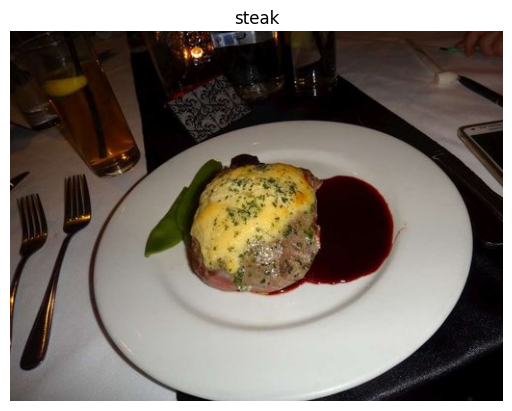

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

After going through a dozen or so images from the different classes, you can start to get an idea of what we're working with.

The entire Food101 dataset comprises of similar images from 101 different classes.

You might've noticed we've been printing the image shape alongside the plotted image.

This is because the way our computer sees the image is in the form of a big array (tensor).

array([[[ 8,  0,  0],
        [10,  2,  0],
        [13,  5,  3],
        ...,
        [47, 19,  8],
        [44, 16,  5],
        [43, 15,  4]],

       [[ 8,  0,  0],
        [10,  2,  0],
        [13,  5,  3],
        ...,
        [48, 20,  9],
        [46, 18,  7],
        [45, 17,  6]],

       [[ 8,  0,  0],
        [10,  2,  0],
        [12,  4,  2],
        ...,
        [49, 19,  9],
        [48, 18,  8],
        [48, 18,  8]],

       ...,

       [[80, 76, 73],
        [80, 76, 73],
        [81, 77, 74],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[77, 73, 70],
        [77, 73, 70],
        [78, 74, 71],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[74, 70, 67],
        [75, 71, 68],
        [76, 72, 69],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)
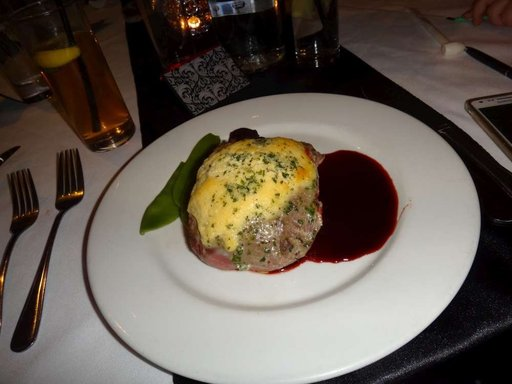

In [ ]:
# View the img (actually just a big array/tensor)
img

In [ ]:
# View the image shape
img.shape # returns (width, height, colour channels)

(384, 512, 3)

#Looking at the image shape more closely, you'll see it's in the form `(Width, Height, Colour Channels)`.

In our case, the width and height vary but because we're dealing with colour images, the colour channels value is always 3. This is for different values of [red, green and blue (RGB) pixels](https://en.wikipedia.org/wiki/RGB_color_model).

You'll notice all of the values in the `img` array are between 0 and 255. This is because that's the possible range for red, green and blue values.

For example, a pixel with a value `red=0, green=0, blue=255` will look very blue.

So when we build a model to differentiate between our images of `pizza` and `steak`, it will be finding patterns in these different pixel values which determine what each class looks like.

> 🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255.

In [ ]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.03137255, 0.        , 0.        ],
        [0.03921569, 0.00784314, 0.        ],
        [0.05098039, 0.01960784, 0.01176471],
        ...,
        [0.18431373, 0.0745098 , 0.03137255],
        [0.17254902, 0.0627451 , 0.01960784],
        [0.16862745, 0.05882353, 0.01568627]],

       [[0.03137255, 0.        , 0.        ],
        [0.03921569, 0.00784314, 0.        ],
        [0.05098039, 0.01960784, 0.01176471],
        ...,
        [0.18823529, 0.07843137, 0.03529412],
        [0.18039216, 0.07058824, 0.02745098],
        [0.17647059, 0.06666667, 0.02352941]],

       [[0.03137255, 0.        , 0.        ],
        [0.03921569, 0.00784314, 0.        ],
        [0.04705882, 0.01568627, 0.00784314],
        ...,
        [0.19215686, 0.0745098 , 0.03529412],
        [0.18823529, 0.07058824, 0.03137255],
        [0.18823529, 0.07058824, 0.03137255]],

       ...,

       [[0.31372549, 0.29803922, 0.28627451],
        [0.31372549, 0.29803922, 0.28627451],
        [0.31764706, 0

## A (typical) architecture of a convolutional neural network

Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways. What you see below are some components you'd expect to find in a traditional CNN.


# Components of a convolutional neural network:

| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |

How they stack together:

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-simple-convnet.png)
*A simple example of how you might stack together the above layers into a convolutional neural network. Note the convolutional and pooling layers can often be arranged and rearranged into many different formations.*

## An end-to-end example

We've checked out our data and found there's 750 training images, as well as 250 test images per class and they're all of various different shapes.

It's time to jump straight in the deep end.

Reading the [original dataset authors paper](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf), we see they used a [Random Forest machine learning model](https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d) and averaged 50.76% accuracy at predicting what different foods different images had in them.

From now on, that 50.76% will be our baseline.

> 🔑 **Note:** A **baseline** is a score or evaluation metric you want to try and beat. Usually you'll start with a simple model, create a baseline and try to beat it by increasing the complexity of the model. A really fun way to learn machine learning is to find some kind of modelling paper with a published result and try to beat it.

The code in the following cell replicates and end-to-end way to model our `pizza_steak` dataset with a convolutional neural network (CNN) using the components listed above.

There will be a bunch of things you might not recognize but step through the code yourself and see if you can figure out what it's doing.

We'll go through each of the steps later on in the notebook.

For reference, the model we're using replicates TinyVGG, the computer vision architecture which fuels the [CNN explainer webpage](https://poloclub.github.io/cnn-explainer/).

> 📖 **Resource:** The architecture we're using below is a scaled-down version of [VGG-16](https://arxiv.org/abs/1505.06798), a convolutional neural network which came 2nd in the 2014 [ImageNet classification competition](http://image-net.org/).

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3))]), # first layer specifies input shape (height,

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Model 1 -CNN with Tensorflow - a simple example
This code snippet is a typical setup for training a Convolutional Neural Network (CNN) using TensorFlow and Keras to classify images.

The task in this case involves binary classification, likely distinguishing between two classes such as "pizza" and "steak."


---

# 1. Imports

    import tensorflow as tf
    from tensorflow.keras.preprocessing.image import ImageDataGenerator

##tensorflow as tf:

TensorFlow is an open-source machine learning framework. Here, it is being imported with the alias tf.

--------------------
##ImageDataGenerator:

This Keras class is used for real-time data augmentation and preprocessing of image data.

It can generate batches of tensor image data with real-time data augmentation, making it very useful for training deep learning models on large datasets.

---------------------
#2. Set the Seed

    tf.random.set_seed(42)

##tf.random.set_seed(42):

Setting a random seed ensures that the random processes in TensorFlow (like shuffling and splitting data) produce the same results every time you run the code.

This makes your experiments reproducible.

-----------------------
#3. Preprocess Data

    train_datagen = ImageDataGenerator(rescale=1./255)
    valid_datagen = ImageDataGenerator(rescale=1./255)

##ImageDataGenerator(rescale=1./255):

This line creates an instance of ImageDataGenerator that scales all pixel values in the images from their original range (0 to 255) down to a range between 0 and 1. This is done by dividing each pixel value by 255.

This process is called normalization and it helps the neural network converge more quickly during training.

##train_datagen: Used for preprocessing the training data.

##valid_datagen: Used for preprocessing the validation data.

------------------------------

#4. Setup the Train and Test Directories

    train_dir = "pizza_steak/train/"
    test_dir = "pizza_steak/test/"

##train_dir:

Path to the directory containing training images, likely organized into subdirectories by class (e.g., pizza and steak).

##test_dir:

Path to the directory containing validation images, also organized by class.

-------------------------
#5. Import Data and Create Batches

    train_data = train_datagen.flow_from_directory(
       train_dir,
       batch_size=32,
       target_size=(224, 224),
       class_mode="binary",
       seed=42
       )

    valid_data = valid_datagen.flow_from_directory(
        test_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode="binary",
        seed=42
     )

##flow_from_directory:

This method loads images from the specified directory (train_dir or test_dir), applies the preprocessing specified by the ImageDataGenerator (in this case, normalization), and organizes the images into batches for training or validation.

##batch_size=32:

The number of images to be processed in a single batch. Batching helps in efficient training, especially when dealing with large datasets.

##target_size=(224, 224):

Resizes all images to 224x224 pixels. This is common for CNNs as it ensures all input images are of the same size.

class_mode="binary":

Indicates that the problem is a binary classification problem, where there are only two classes. The labels returned will be either 0 or 1.
seed=42: Again, this ensures the process is reproducible by setting the random seed.

-------
#6. Create a CNN Model

    model_1 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3))
      ])

##tf.keras.models.Sequential:

A Sequential model in Keras is a linear stack of layers. Here, it is used to define a simple Convolutional Neural Network (CNN).

##tf.keras.layers.Conv2D:

This is a 2D convolutional layer that applies filters (kernels) to the input image to extract features such as edges, textures, etc.

##filters=10:

Specifies the number of filters (output feature maps) in this layer. More filters allow the model to learn more complex features.

##kernel_size=3:

Specifies the size of the filter. A 3x3 filter is very common in CNNs as it captures small patterns in the image.

##activation="relu":

Applies the ReLU (Rectified Linear Unit) activation function, which introduces non-linearity into the model. ReLU is commonly used in CNNs because it helps the model learn complex patterns.

##input_shape=(224, 224, 3):

Specifies the shape of the input data. Here, it indicates that the input images will be 224x224 pixels with 3 color channels (RGB).

------------------------
#Summary
Preprocessing: The images are normalized to a range of [0, 1] to help the neural network train more effectively.

Data Loading: Images are loaded from directories, resized, and batched using ImageDataGenerator.

Model Definition: A basic CNN model is defined with a single convolutional layer, which will process the images and start learning features from them.
This setup is typical in image classification tasks where you want to train a CNN model on a dataset of images organized in directories by class.





> 🤔 **Note:** If the cell above takes more than ~12 seconds per epoch to run, you might not be using a GPU accelerator. If you're using a Colab notebook, you can access a GPU accelerator by going to Runtime -> Change Runtime Type -> Hardware Accelerator and select "GPU". After doing so, you might have to rerun all of the above cells as changing the runtime type causes Colab to have to reset.





Nice! After 5 epochs, our model beat the baseline score of 50.76% accuracy (our model got ~85% accuaracy on the training set and ~85% accuracy on the test set).

However, our model only went through a binary classificaiton problem rather than all of the 101 classes in the Food101 dataset, so we can't directly compare these metrics. That being said, the results so far show that our model is learning something.

> 🛠 **Practice:** Step through each of the main blocks of code in the cell above, what do you think each is doing? It's okay if you're not sure, we'll go through this soon. In the meantime, spend 10-minutes playing around the incredible [CNN explainer website](https://poloclub.github.io/cnn-explainer/). What do you notice about the layer names at the top of the webpage?


Since we've already fit a model, let's check out its architecture.

#Model 1 - CNN Architecture

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3))]) # remove the trailing comma here

# Check out the layers in our model
model_1.summary()

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 280 (1.09 KB)

 Trainable params: 280 (1.09 KB)

 Non-trainable params: 0 (0.00 B)

What do you notice about the names of `model_1`'s layers and the layer names at the top of the [CNN explainer website](https://poloclub.github.io/cnn-explainer/)?

I'll let you in on a little secret: we've replicated the exact architecture they use for their model demo.

Look at you go! **You're already starting to replicate models you find in the wild.**

Now there are a few new things here we haven't discussed, namely:
* The [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) class and the `rescale` parameter
* The [`flow_from_directory()`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory) method
  * The `batch_size` parameter
  * The `target_size` parameter
* [`Conv2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) layers (and the parameters which come with them)
* [`MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers (and their parameters).
* The `steps_per_epoch` and `validation_steps` parameters in the `fit()` function

Before we dive into each of these, let's see what happens if we try to fit a model we've worked with previously to our data.


## Model 2 -Using the same model as before

To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.

> 🔑 **Note:** If you haven't gone through the previous classification notebook, no troubles, we'll be bringing in the a simple 4 layer architecture used to separate dots replicated from the [TensorFlow Playground environment](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.75075&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

We can use all of the same parameters in our previous model except for changing two things:
* **The data** - we're now working with images instead of dots.
* **The input shape** - we have to tell our neural network the shape of the images we're working with.
  * A common practice is to reshape images all to one size. In our case, we'll resize the images to `(224, 224, 3)`, meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.

In [ ]:
import tensorflow as tf

# Set random seed for reproducibility
tf.random.set_seed(42)

# Create a CNN model
model_2 = tf.keras.Sequential([
    # First convolutional layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),  # Reduce the spatial dimensions by half

    # Second convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),  # Reduce the spatial dimensions by half

    # Third convolutional layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),  # Reduce the spatial dimensions by half

    # Flatten the feature maps to feed into the dense layers
    tf.keras.layers.Flatten(),

    # Fully connected layer with 128 neurons
    tf.keras.layers.Dense(128, activation='relu'),

    # Output layer with 1 neuron (for binary classification)
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
import tensorflow as tf

# Set random seed for reproducibility
tf.random.set_seed(42)

# Create a CNN model
model_2 = tf.keras.Sequential([
    # First convolutional layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),  # Reduce the spatial dimensions by half

    # Second convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),  # Reduce the spatial dimensions by half

    # Third convolutional layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),  # Reduce the spatial dimensions by half

    # Flatten the feature maps to feed into the dense layers
    tf.keras.layers.Flatten(),

    # Fully connected layer with 128 neurons
    tf.keras.layers.Dense(128, activation='relu'),

    # Output layer with 1 neuron (for binary classification)
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# Ensure proper generator setup
print("Train data batches:", len(train_data))
print("Validation data batches:", len(valid_data))

# Fit the model
history_2 = model_2.fit(
    train_data,  # use the same training data created earlier
    epochs=5,
    validation_data=valid_data  # use the same validation data created earlier
)



Train data batches: 47
Validation data batches: 16
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 302ms/step - accuracy: 0.5806 - loss: 1.1256 - val_accuracy: 0.7720 - val_loss: 0.4615
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 126ms/step - accuracy: 0.8033 - loss: 0.4468 - val_accuracy: 0.8400 - val_loss: 0.3680
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.8468 - loss: 0.3607 - val_accuracy: 0.8740 - val_loss: 0.3042
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.8755 - loss: 0.3059 - val_accuracy: 0.8680 - val_loss: 0.3128
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 114ms/step - accuracy: 0.9022 - loss: 0.2512 - val_accuracy: 0.8900 - val_loss: 0.3003


# Building model 2


---

# import tensorflow as tf

# Set random seed for reproducibility
    tf.random.set_seed(42)

Setting the random seed ensures that the results are reproducible. This means that if you run the code multiple times, you will get the same results each time, which is useful for debugging and comparing experiments.


---



# Creating the CNN Model -Model 2

    model_2 = tf.keras.Sequential([
      # First convolutional layer
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),  # Reduce the spatial dimensions by half
    
      # Second convolutional layer
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),  # Reduce the spatial dimensions by half
    
      # Third convolutional layer
      tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),  # Reduce the spatial dimensions by half
    
      # Flatten the feature maps to feed into the dense layers
      tf.keras.layers.Flatten(),
    
      # Fully connected layer with 128 neurons
      tf.keras.layers.Dense(128, activation='relu'),
    
      # Output layer with 1 neuron (for binary classification)
      tf.keras.layers.Dense(1, activation='sigmoid')
    ])

##tf.keras.Sequential

This defines a linear stack of layers where each layer has exactly one input tensor and one output tensor.

##Convolutional Layers (Conv2D):

Extract features from images using filters.

The number of filters (e.g., 32, 64, 128) determines the depth of the output feature maps.

##The tf.keras.layers.Conv2D layer is a fundamental component in Convolutional Neural Networks (CNNs).

##It performs a convolution operation that helps the network learn spatial hierarchies in images. Here’s a breakdown of the parameters and their roles:

    tf.keras.layers.Conv2D(32, (3, 3), ...)

##32: Number of Filters (or Kernels)
This parameter specifies the number of filters (or kernels) in the convolutional layer.

Each filter will learn to detect different features from the input images.

##Effect:
With 32 filters, the output of this layer will have 32 channels, each representing different detected features.

##(3, 3): Kernel Size

This tuple represents the dimensions of the convolutional kernel (or filter). Here, it is a 3x3 matrix.

##Effect:
A 3x3 kernel will slide over the input image to perform the convolution operation.

This size is typical for capturing local patterns in images.
Additional Parameters (not shown here but commonly used):

##activation:

Specifies the activation function to be applied to the output of each filter. Common choices include 'relu' for introducing non-linearity.

##input_shape:

Specifies the shape of the input data. It is usually provided only in the first convolutional layer to define the shape of the input images (e.g., (224, 224, 3) for 224x224 RGB images).

-----------------------------
#How Conv2D Works
##Convolution Operation:

The filter (kernel) of size 3x3 slides over the input image and performs element-wise multiplication with the portion of the image it covers.

The results of these multiplications are summed up to produce a single pixel in the output feature map.

##Feature Detection:

Each filter learns to detect specific features such as edges, textures, or patterns. The output feature maps (with 32 channels) capture these learned features across the input image.

##Stride and Padding (not specified here but commonly used):

##stride:

The step size with which the filter moves across the image. If not specified, it defaults to (1, 1), meaning the filter moves one pixel at a time.

In the context of convolutional neural networks (CNNs), the stride is an important parameter that controls how the convolutional filter (or kernel) moves across the input image. Here's a detailed explanation:

#What is a Convolutional Filter?
A convolutional filter is a small matrix (often 3x3, 5x5, etc.) that slides over the input image and performs a mathematical operation called convolution. This operation produces a new matrix (called a feature map) that highlights certain features of the input image, like edges or textures.

#What is Stride?
The stride defines the step size by which the convolutional filter moves across the image during the convolution operation.

#Stride of (1, 1):

This is the default stride, meaning that the filter moves one pixel at a time horizontally and vertically across the image. This results in a feature map that is similar in size to the input image (assuming no padding is used).

#Stride of (2, 2):

With a stride of 2, the filter moves two pixels at a time in both directions. This results in a feature map that is smaller than the input image, effectively reducing the spatial dimensions of the output.

#Example of Stride
Let's say you have a 5x5 input image and a 3x3 filter:

With a Stride of (1, 1):

The filter starts at the top-left corner of the image.
It moves one pixel to the right, then one more, until it reaches the end of the row.

Then it moves one pixel down and starts again from the left side.
This results in more overlapping regions and produces a larger feature map.
With a Stride of (2, 2):

The filter starts at the top-left corner but then jumps two pixels to the right after each operation.

After finishing a row, it jumps down two pixels.
This reduces the number of positions where the filter is applied, leading to a smaller feature map.

#Why is Stride Important?
##Downsampling:

Using a larger stride (e.g., 2 or more) effectively downsamples the input, reducing its spatial dimensions. This can help in reducing the computational complexity and making the model more efficient.

##Feature Detection:

The stride affects how features are detected in the input image. A smaller stride allows the model to capture finer details, while a larger stride might miss some details but focus on more prominent features.

##Visual Representation
Imagine sliding a magnifying glass over a picture:

A stride of 1 is like moving the magnifying glass slowly, seeing every tiny detail.

A stride of 2 is like jumping over some areas, focusing on the larger, more obvious features.

This balance between stride size and detail capture is crucial in designing CNNs for tasks like image recognition.


##padding:

Determines whether the input image is padded with zeros around the edges. Common options are 'valid' (no padding) and 'same' (padding to keep the output size the same as the input size).

------------------------------
#Example

    import tensorflow as tf

# Create a Conv2D layer
    conv_layer = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3))

# Print the layer summary
    print(conv_layer)

In this example:

32 filters will be used to process the input image.

Each filter has a 3x3 size.

The layer uses the ReLU activation function (activation='relu') to introduce non-linearity.

    tf.keras.layers.Conv2D is a key layer in CNNs, used for detecting features in images.

32 filters learn different features.

(3, 3) specifies the size of each filter.

Commonly used parameters include activation functions, stride, and padding to fine-tune the layer’s behavior.

Feel free to ask more questions if you need further clarification!

------
##Parameters:
32, 64, 128: Number of filters in each convolutional layer.

(3, 3): Size of the convolutional kernel/filter.

activation='relu': The ReLU activation function introduces non-linearity into the model.

Pooling Layers (MaxPooling2D):

Reduce the spatial dimensions (width and height) of the feature maps, which helps to reduce computational load and control overfitting.

------
##Parameters:
2, 2: Pooling size, meaning it reduces the dimensions by a factor of 2.

##Flatten Layer:

Convert the 2D feature maps into a 1D vector so that they can be fed into fully connected (dense) layers.

##Dense Layers:

Fully connected layers where each neuron is connected to every neuron in the previous layer.

----------------------
##Parameters:
128 neurons in the hidden layer with relu activation to learn complex representations.

1 neuron in the output layer with sigmoid activation for binary classification, which outputs a probability score between 0 and 1.

----------------------

# Compile the model
    model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
    loss='binary_crossentropy':

Binary cross-entropy loss is used for binary classification tasks. It measures the difference between the predicted probability and the actual class label.

------
##optimizer=tf.keras.optimizers.Adam():

Adam optimizer adjusts the learning rate during training to improve the convergence speed and stability.

    metrics=["accuracy"]:

Metrics are used to monitor the performance of the model during training and evaluation.

Here, accuracy is used to assess how often the model’s predictions are correct.

# Ensure proper generator setup
    print("Train data batches:", len(train_data))
    print("Validation data batches:", len(valid_data))

Print the number of batches in the training and validation data generators to verify that they are correctly set up and that there are enough batches to cover the number of steps specified.

# Fit the model
    history_2 = model_2.fit(
       train_data,  # use the same training data created earlier
       epochs=5,
       validation_data=valid_data  # use the same validation data created earlier
    )
train_data: The training data generator providing batches of images and labels.

epochs=5:
Number of times the model will iterate over the entire training dataset.

validation_data=valid_data:

The validation data generator used to evaluate the model’s performance after each epoch.

------------------------------
#Summary
Setting a Random Seed: Ensures reproducibility of results.

Building a CNN Model: Layers are set up to extract features from images and perform binary classification.

3. Compiling the Model: Configures the model for training with a specific loss function, optimizer, and evaluation metric.
4. Checking Data Generators: Verifies the setup of training and validation data generators.
5. Fitting the Model: Trains the model on the data and validates it after each epoch.

-----------------
---------------------------
#Full Revised Code
Here’s the full code snippet you provided, cleaned up and explained:

import tensorflow as tf

# Set random seed for reproducibility
    tf.random.set_seed(42)

# Create a CNN model
    model_2 = tf.keras.Sequential([
       # First convolutional layer
       tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
       tf.keras.layers.MaxPooling2D(2, 2),  # Reduce the spatial dimensions by half
    
    # Second convolutional layer
       tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
       tf.keras.layers.MaxPooling2D(2, 2),  # Reduce the spatial dimensions by half
    
    # Third convolutional layer
       tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
       tf.keras.layers.MaxPooling2D(2, 2),  # Reduce the spatial dimensions by half
    
    # Flatten the feature maps to feed into the dense layers
      tf.keras.layers.Flatten(),
    
    # Fully connected layer with 128 neurons
       tf.keras.layers.Dense(128, activation='relu'),
    
    # Output layer with 1 neuron (for binary classification)
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Ensure proper generator setup
    print("Train data batches:", len(train_data))
    print("Validation data batches:", len(valid_data))

# Fit the model
    history_2 = model_2.fit(
      train_data,  # use the same training data created earlier
      epochs=5,
      validation_data=valid_data  # use the same validation data created earlier
   )

--------------------
##Explanation of Each Component
Random Seed: tf.random.set_seed(42) ensures that the results are consistent every time you run the code.

##CNN Model Creation:

##Convolutional Layers:

Conv2D layers extract features from the input images. Each convolutional layer is followed by a MaxPooling2D layer to reduce the dimensionality.

##Flatten Layer:

Converts 2D feature maps into a 1D vector for the fully connected layers.
Dense Layers: Dense layers are fully connected layers. The final dense layer uses a sigmoid activation function for binary classification.

##Model Compilation:

##Loss Function:

binary_crossentropy is suitable for binary classification tasks.

##Optimizer:

Adam adjusts the learning rate during training.

##Metrics:

accuracy is used to measure the proportion of correctly classified examples.

##Data Generator Check:

Ensures that the data generators are set up correctly by printing the number of batches.

##Model Training:

fit Method: Trains the model on the training data and validates it using the validation data.

If you encounter any specific errors or issues, make sure that:

The data generators (train_data and valid_data) are correctly set up and provide batches as expected.

The input_shape of the first convolutional layer matches the shape of your input images.

All necessary libraries and versions are compatible.

Feel free to ask if you need further details or help with any specific part of the code!

Hmmm... our model ran but it doesn't seem like it learned anything. It only reaches 50% accuracy on the training and test sets which in a binary classification problem is as good as guessing.

Let's see the architecture.

In [ ]:
# Check out our second model's architecture
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,507,269 (127.82 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,338,180 (85.21 MB)

Wow. One of the most noticeable things here is the much larger number of parameters in `model_2` versus `model_1`.

`model_2` has 602,141 trainable parameters where as `model_1` has only 31,101. And despite this difference, `model_1` still far and large out performs `model_2`.

> 🔑 **Note:** You can think of trainable parameters as *patterns a model can learn from data*. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different **features** in an image.

Since our previous model didn't work, do you have any ideas of how we might make it work?

How about we increase the number of layers?

And maybe even increase the number of neurons in each layer?

More specifically, we'll increase the number of neurons (also called hidden units) in each dense layer from 4 to 100 and add an extra layer.

> 🔑 **Note:** Adding extra layers or increasing the number of neurons in each layer is often referred to as increasing the **complexity** of your model.

# Model 3

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a model with an Input layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(224, 224, 3)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model (automatically calculate steps_per_epoch)
history_3 = model_3.fit(train_data,
                        epochs=5,
                        validation_data=valid_data)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - accuracy: 0.5707 - loss: 4.0230 - val_accuracy: 0.5840 - val_loss: 1.2798
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.6796 - loss: 1.1195 - val_accuracy: 0.6280 - val_loss: 0.8669
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.6365 - loss: 1.2896 - val_accuracy: 0.7900 - val_loss: 0.5062
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.7469 - loss: 0.6801 - val_accuracy: 0.7840 - val_loss: 0.5023
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.7697 - loss: 0.5092 - val_accuracy: 0.7220 - val_loss: 0.7246


Woah! Looks like our model is learning again. It got ~70% accuracy on the training set and ~70% accuracy on the validation set.

How does the architecute look?

In [ ]:
# Check out model_3 architecture
model_3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

My gosh, the number of trainable parameters has increased even more than `model_2`. And even with close to 500x (~15,000,000 vs. ~31,000) more trainable parameters, `model_3` still doesn't out perform `model_1`.

This goes to show the power of convolutional neural networks and their ability to learn patterns despite using less parameters.

## Binary classification: Let's break it down

We just went through a whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

Let's step through each.

### 1. Import and become one with the data

Whatever kind of data you're dealing with, it's a good idea to visualize at least 10-100 samples to start to building your own mental model of the data.

In our case, we might notice that the steak images tend to have darker colours where as pizza images tend to have a distinct circular shape in the middle. These might be patterns that our neural network picks up on.

You an also notice if some of your data is messed up (for example, has the wrong label) and start to consider ways you might go about fixing it.

> 📖 **Resource:** To see how this data was processed into the file format we're using, see the [preprocessing notebook](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb).

If the visualization cell below doesn't work, make sure you've got the data by uncommenting the cell below.

In [ ]:
# import zipfile

# # Download zip file of pizza_steak images
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


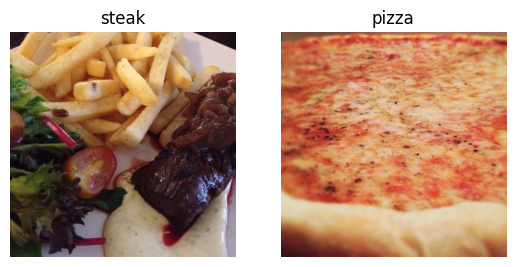

In [ ]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

One of the most important steps for a machine learning project is creating a training and test set.

In our case, our data is already split into training and test sets. Another option here might be to create a validation set as well, but we'll leave that for now.

For an image classification project, it's standard to have your data seperated into `train` and `test` directories with subfolders in each for each class.

To start we define the training and test directory paths.

In [ ]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A **batch** is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:
* 10,000 images (or more) might not fit into the memory of your processor (GPU).
* Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

A [batch size of 32 is good for your health](https://twitter.com/ylecun/status/989610208497360896?s=20).

No seriously, there are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

To turn our data into batches, we'll first create an instance of [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) for each of our datasets.


In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

The `ImageDataGenerator` class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model.

You might've noticed the `rescale` parameter. This is one example of the transformations we're doing.

Remember from before how we imported an image and it's pixel values were between 0 and 255?

The `rescale` parameter, along with `1/255.` is like saying "divide all of the pixel values by 255". This results in all of the image being imported and their pixel values being normalized (converted to be between 0 and 1).

> 🔑 **Note:** For more transformation options such as data augmentation (we'll see this later), refer to the [`ImageDataGenerator` documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).

Now we've got a couple of ImageDataGenerator instances, we can load our images from their respective directories using the [`flow_from_directory`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory) method.

In [ ]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Wonderful! Looks like our training dataset has 1500 images belonging to 2 classes (pizza and steak) and our test dataset has 500 images also belonging to 2 classes.

Some things to here:
* Due to how our directories are structured, the classes get inferred by the subdirectory names in `train_dir` and `test_dir`.
* The `target_size` parameter defines the input size of our images in `(height, width)` format.
* The `class_mode` value of `'binary'` defines our classification problem type. If we had more than two classes, we would use `'categorical'`.
* The `batch_size` defines how many images will be in each batch, we've used 32 which is the same as the default.

We can take a look at our batched images and labels by inspecting the `train_data` object.

In [ ]:
# Get a sample of the training data batch
images, labels = next(train_data) # get the 'next' batch of images/labels using __next__
len(images), len(labels)

(32, 32)

#Wonderful, it seems our images and labels are in batches of 32.

Let's see what the images look like.

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.23529413, 0.21568629, 0.14117648],
          [0.2509804 , 0.22352943, 0.14901961],
          [0.26666668, 0.22352943, 0.15294118],
          ...,
          [0.47058827, 0.4156863 , 0.3137255 ],
          [0.47450984, 0.4156863 , 0.33333334],
          [0.4156863 , 0.35686275, 0.28235295]],
 
         [[0.24313727, 0.22352943, 0.14901961],
          [0.24705884, 0.21960786, 0.14509805],
          [0.24705884, 0.20392159, 0.13333334],
          ...,
          [0.48627454, 0.427451  , 0.3372549 ],
          [0.47450984, 0.4156863 , 0.33333334],
          [0.47058827, 0.40784317, 0.34509805]],
 
         [[0.2509804 , 0.23137257, 0.15686275],
          [0.26666668, 0.2392157 , 0.16862746],
          [0.23529413, 0.20392159, 0.12941177],
          ...,
          [0.4666667 , 0.4156863 , 0.34117648],
          [0.4666667 , 0.4156863 , 0.34901962],
          [0.48235297, 0.43137258, 0.36862746]],
 
         ...,
 
         [[0.46274513, 0.43921572, 0.38431376],
          [0.46274

Due to our `rescale` parameter, the images are now in `(224, 224, 3)` shape tensors with values between 0 and 1.

How about the labels?

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.],
      dtype=float32)

Due to the `class_mode` parameter being `'binary'` our labels are either `0` (pizza) or `1` (steak).

Now that our data is ready, our model is going to try and figure out the patterns between the image tensors and the labels.

#3. Create a model (start with a baseline)

You might be wondering what your default model architecture should be.

And the truth is, there's many possible answers to this question.

A simple heuristic for computer vision models is to use the model architecture which is performing best on [ImageNet](https://www.image-net.org/) (a large collection of diverse images to benchmark different computer vision models).

However, to begin with, it's good to build a smaller model to acquire a baseline result which you try to improve upon.

> 🔑 **Note:** In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.

In our case, let's take a smaller version of the model that can be found on the [CNN explainer website](https://poloclub.github.io/cnn-explainer/) (`model_1` from above) and build a 3 layer convolutional neural network.

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

Great! We've got a simple convolutional neural network architecture ready to go.

And it follows the typical CNN structure of:

```
Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output
```

Let's discuss some of the components of the `Conv2D` layer:

* The "`2D`" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
* `filters` - these are the number of "feature extractors" that will be moving over our images.
* `kernel_size` - the size of our filters, for example, a `kernel_size` of `(3, 3)` (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
* `stride` - the number of pixels a `filter` will move across as it covers the image. A `stride` of 1 means the filter moves across each pixel 1 by 1. A `stride` of 2 means it moves 2 pixels at a time.
* `padding` - this can be either `'same'` or `'valid'`, `'same'` adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as `'valid'` (default) cuts off excess pixels where the `filter` doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

What's a "feature"?

A **feature** can be considered any significant part of an image. For example, in our case, a feature might be the circular shape of pizza. Or the rough edges on the outside of a steak.

It's important to note that these **features** are not defined by us, instead, the model learns them as it applies different filters across the image.

> 📖 **Resources:** For a great demonstration of these in action, be sure to spend some time going through the following:
  * [CNN Explainer Webpage](https://poloclub.github.io/cnn-explainer/) - a great visual overview of many of the concepts we're replicating here with code.
  * [A guide to convolutional arithmetic for deep learning](https://arxiv.org/pdf/1603.07285.pdf) - a phenomenal introduction to the math going on behind the scenes of a convolutional neural network.
  * For a great explanation of padding, see this [Stack Overflow answer](https://stackoverflow.com/a/39371113/7900723).

Now our model is ready, let's compile it.

In [ ]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

Since we're working on a binary classification problem (pizza vs. steak), the `loss` function we're using is `'binary_crossentropy'`, if it was mult-iclass, we might use something like `'categorical_crossentropy'`.

Adam with all the default settings is our optimizer and our evaluation metric is accuracy.

### 4. Fit a model

Our model is compiled, time to fit it.

You'll notice two new parameters here:
* `steps_per_epoch` - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of `train_data` (1500 images in batches of 32 = 1500/32 = ~47 steps)
* `validation_steps` - same as above, except for the `validation_data` parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [ ]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model with adjusted validation steps
history_4 = model_4.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    # Set validation_steps to 1 to ensure at least one validation step
    validation_steps=1
)

# Check if test_data is properly configured and contains data
print(len(test_data))
if len(test_data) > 0:
    for batch in test_data:
        print(batch)
        break
else:
    print("test_data is empty. Check the data source and preprocessing steps.")

# Check the types of data in test_data
if len(test_data) > 0:
    for batch in test_data:
        print(type(batch))
        for item in batch:
            print(type(item))
        break

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 189ms/step - accuracy: 0.5158 - loss: 4.1821 - val_accuracy: 0.5938 - val_loss: 0.6849
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.6971
Epoch 3/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.6707 - loss: 0.6123 - val_accuracy: 0.8125 - val_loss: 0.4614
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.4979
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.8116 - loss: 0.4307 - val_accuracy: 0.8125 - val_loss: 0.3001
16
(array([[[[0.38431376, 0.2509804 , 0.21176472],
         [0.3921569 , 0.25882354, 0.21960786],
         [0.3921569 , 0.25882354, 0.21960786],
         ...,
         [0.5019608 , 0.3137255 , 0.23529413],
         [0.49803925, 0.30980393, 0.23137257],
         [0.49411768, 0.30588236, 0.21960786]],

        [[0.39607847, 0.2627451 , 0.22352943],
         [0.39607847, 0.2627451 , 0.22352943],
         [0.3921569 , 0.25882354, 0.21960786],
         ...,
         [0.5058824 , 0.31764707, 0.2392157 ],
         [0.5019608 , 0.3137255 , 0.23529413],
         [0.5019608 , 0.3137255 , 0.227451  ]],

        [[0.39607847, 0.2

Oh yeah! Looks like our model is learning something.

Let's check out its training curves.

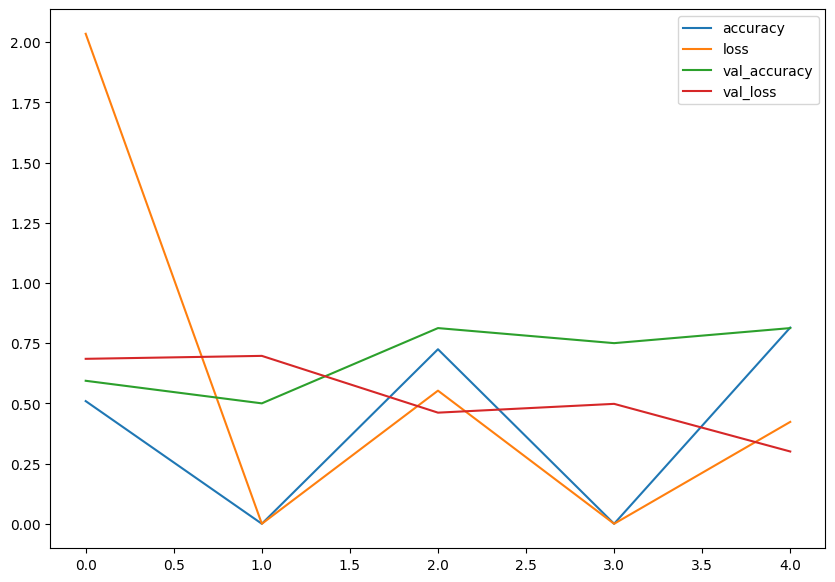

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

Hmm, judging by our loss curves, it looks like our model is **overfitting** the training dataset.

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus its ability to generalize to unseen data will be diminished.

To further inspect our model's training performance, let's separate the accuracy and loss curves.

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

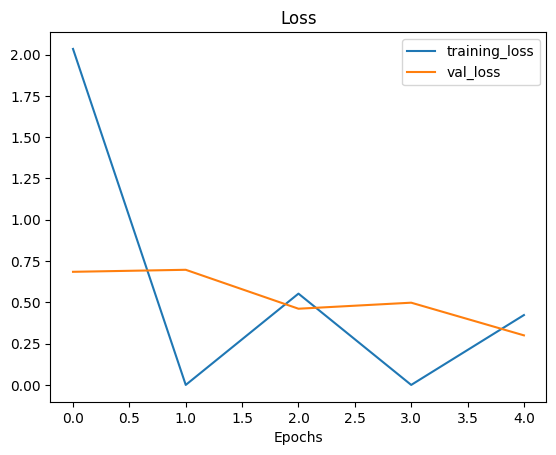

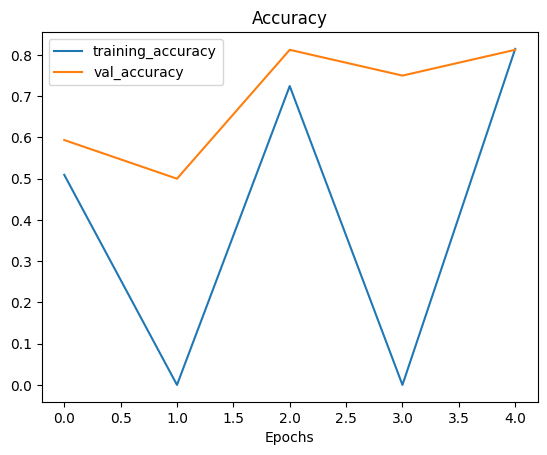

In [ ]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

In [ ]:
# Check out our model's architecture
model_4.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,432,025 (5.46 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 954,684 (3.64 MB)

#6. Adjust the model parameters

Fitting a machine learning model  comes in 3 steps:
0. Create a basline.
1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.

So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:
* Increase the number of convolutional layers.
* Increase the number of convolutional filters.
* Add another dense layer to the output of our flattened layer.

But what we'll do instead is focus on getting our model's training curves to better align with eachother, in other words, we'll take on step 2.

Why is reducing overfitting important?

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.

Say we were building a pizza vs. steak food classifier app, and our model performs very well on our training data but when users tried it out, they didn't get very good results on their own food images, is that a good experience?

Not really...

So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

Namely, we'll build 2 more models:
* A ConvNet with [max pooling](https://deeplizard.com/learn/video/ZjM_XQa5s6s)
* A ConvNet with max pooling and data augmentation

For the first model, we'll follow the modified basic CNN structure:

```
Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output
```

Let's built it. It'll have the same structure as `model_4` but with a [`MaxPool2D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layer after each convolutional layer.

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Conv2D to Conv2D Architecture
Conv2D and "Neurons" in Convolutional Layers
Conv2D Layer:

# 1. Each Conv2D layer in a Convolutional Neural Network (CNN) is indeed considered a layer, but it's different from a dense layer with traditional "neurons."

Instead of neurons, Conv2D layers use filters (also called kernels). Each filter is a small matrix (e.g., 3x3) that slides over the input image or feature map to detect patterns (like edges, textures, etc.).

##Number of Filters:

If you specify Conv2D(10, 3, ...), the layer uses 10 filters. Each filter generates a separate feature map, resulting in 10 output feature maps.

##Output of Conv2D:

The output of a Conv2D layer is a set of feature maps (one per filter). These feature maps capture different features from the input.

-------------------
#2. How the Output is Used:

The output feature maps from one Conv2D layer become the input to the next Conv2D layer.

The next layer applies its filters to these feature maps to detect higher-level patterns or features.

Each Conv2D layer refines the representation of the input data, making it more abstract as you go deeper into the network.

##Neurons in Conv2D:

In a dense (fully connected) layer, each "neuron" has a weight connecting it to every input from the previous layer.

In a Conv2D layer, each filter acts somewhat like a neuron but in a different sense.

Each filter only "sees" a small local region of the input (determined by the filter size) and produces a single feature map.

---------------------
#Conv2D Layer: Think of it as a layer with multiple "neurons" where each neuron is a filter. Each filter processes the entire input (via convolution) to produce one feature map.

##Output of Conv2D:

Multiple feature maps, one for each filter, are produced. These feature maps become the input to the next layer.

##Next Conv2D Layer:

The process repeats, with the next Conv2D layer processing the feature maps from the previous layer.

So, while it's not exactly correct to think of each Conv2D as a single "neuron," you can think of each filter within a Conv2D as producing its own output (feature map), which is used by the next layer.

The "neuron" analogy breaks down because, in CNNs, filters are more complex and localized in how they process input compared to traditional neurons in dense layers.

# Model 5
# 1. First Convolutional Layer

    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),

##Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)):
###Conv2D:

This layer performs a 2D convolution operation, which applies filters to the input image to detect features like edges, textures, etc.

###10:

The number of filters (or feature maps) the layer learns. Each filter detects a specific pattern in the input.

------------------------
# 2. The size of the filter (3x3 pixels). It slides over the input image to detect features.
###activation='relu':

The ReLU activation function is applied after the convolution operation to introduce non-linearity. ReLU replaces negative values with zero and keeps positive values unchanged.

###input_shape=(224, 224, 3):

Specifies the shape of the input data. Here, the input is an image of size 224x224 pixels with 3 color channels (RGB).

------------------------
#3. First Max Pooling Layer

    MaxPool2D(pool_size=2), # reduce number of features by half

##MaxPool2D(pool_size=2):

This layer performs max pooling, which reduces the spatial dimensions (height and width) of the feature maps.

It takes the maximum value from a 2x2 window, effectively reducing the size of the feature maps by half. This helps in reducing the computational cost and the chance of overfitting.

#What is Max Pooling?
Max Pooling is a downsampling operation used in Convolutional Neural Networks.

It reduces the spatial dimensions (width and height) of the feature maps produced by convolutional layers, which helps in reducing the number of parameters, computational cost, and also helps in making the model more robust to slight translations in the input.

---------------------------
--------------------
#Example with Simple Numbers
Imagine you have a feature map (output from a Conv2D layer) that looks like this:

css
Copy code
4 x 4 Feature Map (Output from Conv2D)

    [  [1, 3, 2, 1],

       [4, 6, 5, 2],

       [7, 8, 9, 4],

       [3, 2, 1, 0]

    ]
Now, let's apply a Max Pooling layer with a pool size of 2x2.

This means that the Max Pooling layer will take 2x2 blocks of this feature map, find the maximum value in each block, and output that as the new value in the pooled feature map.

Here’s how it works step by step:

------------------
##First Block (Top-left 2x2 block):

    [
     [1, 3],
     [4, 6]
    ]
The maximum value in this block is 6.

--------------
##Second Block (Top-right 2x2 block):

    [
     [2, 1],
     [5, 2]
    ]
The maximum value in this block is 5.

---------------------
##Third Block (Bottom-left 2x2 block):

    [
     [7, 8],
     [3, 2]
    ]
The maximum value in this block is 8.

------------------------------
##Fourth Block (Bottom-right 2x2 block):

    [
     [9, 4],
     [1, 0]
    ]
The maximum value in this block is 9.

-------------------------------------------------
#Resulting Pooled Feature Map
After applying Max Pooling, the feature map reduces in size, and the resulting pooled feature map is:

2 x 2 Pooled Feature Map
    [
     [6, 5],
     [8, 9]
    ]

----------------------------
#Applying This to a CNN Model
In a CNN, after several convolutional layers that extract features, you might have a large feature map.

Before passing this feature map to a fully connected (dense) layer, you often use a Max Pooling layer to reduce its size. This reduction helps in:

##Decreasing Computational Load:

By reducing the dimensions, the fully connected layers will have fewer inputs to process, making the network faster and less prone to overfitting.

##Retaining Important Information:

Max Pooling retains the most significant features while discarding less important ones.

##Third Max Pooling Layer in Your Model
Let's consider your model structure, where you have several convolutional layers followed by max-pooling layers:

Conv2D Layer 1: Extracts initial features from the input image.

MaxPool2D Layer 1: Reduces the spatial size of the feature map.

Conv2D Layer 2: Extracts more complex features.

MaxPool2D Layer 2: Further reduces the spatial size.

Conv2D Layer 3: Extracts even more complex features.

MaxPool2D Layer 3: Finally, reduces the feature map size before passing it to the fully connected layer.

-------------------
#Purpose of the Third Max Pooling Layer:
After the third Conv2D layer, the feature map might still be relatively large.

The third MaxPool2D layer further reduces its size, ensuring that the fully connected layer has a manageable number of inputs.

This step is crucial for balancing the model's capacity to learn features and its computational efficiency.

------------------------------------
#Conclusion
Max Pooling layers help compress the feature maps, retaining essential features while reducing computational complexity.

The third Max Pooling layer in your model ensures that the feature maps are sufficiently small before being fed into the dense layer, improving both the model's performance and efficiency.

-------------------------------------
----------------------------------
#4. Second Convolutional Layer

    Conv2D(10, 3, activation='relu'),

This is another convolutional layer with 10 filters and a 3x3 filter size, followed by the ReLU activation function.

This layer further processes the reduced feature maps from the previous layer to detect more complex patterns.

-----------------------------------
#5. Second Max Pooling Layer

    MaxPool2D(),
Another max pooling layer, similar to the first one, is applied to further reduce the spatial dimensions of the feature maps.

----------------------------
#6. Third Convolutional Layer

    Conv2D(10, 3, activation='relu')

A third convolutional layer with the same configuration as the previous ones. This layer continues to extract more detailed features from the reduced feature maps.

---------------------------------------------
#7. Third Max Pooling Layer

    MaxPool2D()

A final max pooling layer to reduce the size of the feature maps before they are passed to the fully connected layer.

----------------------------------------
#8. Flatten Layer

    Flatten()
##Flatten():

This layer takes the 2D feature maps (after the convolution and pooling operations) and flattens them into a 1D vector.

This vector can then be fed into a fully connected (dense) layer.

------------------------------------------
#9. Dense Layer
    Dense(1, activation='sigmoid')

##Dense(1, activation='sigmoid'):

This is the output layer of the network.

##1:

Specifies that the layer has one output neuron, which is typical for binary classification problems (like distinguishing between two classes).

##activation='sigmoid':

The sigmoid activation function is used here, which outputs a value between 0 and 1. This is suitable for binary classification, as the output can be interpreted as a probability.

------------------------------------------------------
#Summary
Model Architecture: The model consists of three convolutional layers, each followed by a max pooling layer. After flattening the output of the last pooling layer, a dense layer with a sigmoid activation function is used to make the final prediction.

Purpose: This model is designed for binary image classification tasks, where the goal is to classify input images into one of two classes. The convolutional layers help extract features from the images, while the fully connected layers make the final classification based on these features.

Woah, we've got another layer type we haven't seen before.

#If convolutional layers learn the features of an image you can think of a Max Pooling layer as figuring out the *most important* of those features. We'll see this an example of this in a moment.

In [ ]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model with adjusted validation steps
history_5 = model_5.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    # Set validation_steps to 1 to ensure at least one validation step
    validation_steps=1
)

# Check if test_data is properly configured and contains data
print(len(test_data))
if len(test_data) > 0:
    for batch in test_data:
        print(batch)
        break
else:
    print("test_data is empty. Check the data source and preprocessing steps.")

# Check the types of data in test_data
if len(test_data) > 0:
    for batch in test_data:
        print(type(batch))
        for item in batch:
            print(type(item))
        break

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - accuracy: 0.6301 - loss: 0.6430 - val_accuracy: 0.8125 - val_loss: 0.3373
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8438 - val_loss: 0.3956
Epoch 3/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.8125 - loss: 0.4228 - val_accuracy: 0.8438 - val_loss: 0.3295
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9062 - val_loss: 0.2910
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.8181 - loss: 0.4213 - val_accuracy: 0.7500 - val_loss: 0.4808
16
(array([[[[0.6784314 , 0.5529412 , 0.47058827],
         [0.6666667 , 0.5411765 , 0.45098042],
         [0.65882355, 0.5254902 , 0.427451  ],
         ...,
         [0.9803922 , 0.9058824 , 0.87843144],
         [0.9803922 , 0.9058824 , 0.87843144],
         [0.9843138 , 0.909804  , 0.882353  ]],

        [[0.65882355, 0.53333336, 0.45098042],
         [0.654902  , 0.5294118 , 0.43921572],
         [0.63529414, 0.5019608 , 0.4039216 ],
         ...,
         [0.9921569 , 0.9176471 , 0.89019614],
         [0.9803922 , 0.9058824 , 0.87843144],
         [0.9803922 , 0.9058824 , 0.87843144]],

        [[0.6666667 , 0.5

Okay, it looks like our model with max pooling (`model_5`) is performing worse on the training set but better on the validation set.

Before we checkout its training curves, let's check out its architecture.

In [ ]:
# Check out the model architecture
model_5.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

Do you notice what's going on here with the output shape in each `MaxPooling2D` layer?

It gets halved each time. This is effectively the `MaxPooling2D` layer taking the outputs of each Conv2D layer and saying "I only want the most important features, get rid of the rest".

The bigger the `pool_size` parameter, the more the max pooling layer will squeeze the features out of the image. However, too big and the model might not be able to learn anything.

The results of this pooling are seen in a major reduction of total trainable parameters (8,861 in `model_5` and 477,431 in `model_4`).

Time to check out the loss curves.

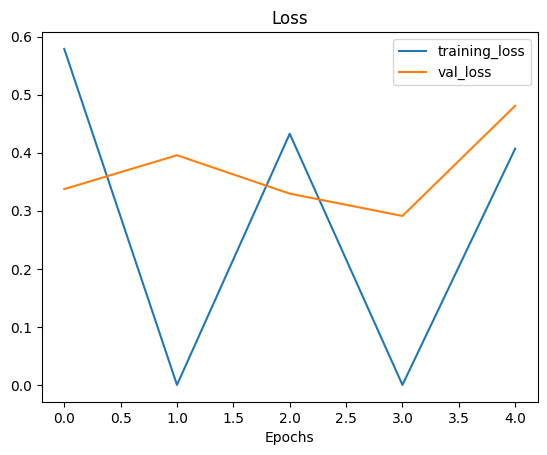

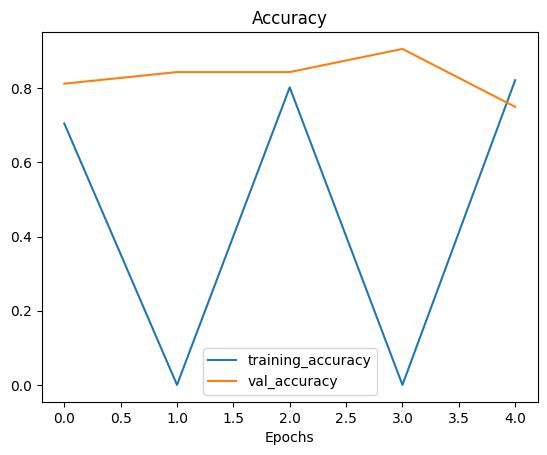

In [ ]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)

Nice! We can see the training curves get a lot closer to eachother. However, our the validation loss looks to start increasing towards the end and in turn potentially leading to overfitting.

Time to dig into our bag of tricks and try another method of overfitting prevention, data augmentation.

First, we'll see how it's done with code then we'll discuss what it's doing.

To implement data augmentation, we'll have to reinstantiate our [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) instances.

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

#Overview of ImageDataGenerator
ImageDataGenerator is a class in Keras that is used to perform data augmentation and preprocessing on the fly while training deep learning models.

This is particularly useful in training convolutional neural networks (CNNs) where large datasets are needed, but collecting or storing such datasets might be difficult.

Data augmentation artificially expands the size of a dataset by creating modified versions of images in the dataset.

-------------------------
#1. train_datagen_augmented

    train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

This instance of ImageDataGenerator is created with data augmentation. Let's look at the individual arguments:

##rescale=1/255.:

This rescales the pixel values of the images by dividing them by 255.

This is a common preprocessing step to normalize the pixel values between 0 and 1 (since pixel values are originally between 0 and 255).

##rotation_range=20:

Randomly rotates the images within a specified range (0 to 20 degrees).

Rotation is useful to make the model invariant to the orientation of the objects in the images.

##shear_range=0.2:

Applies a shearing transformation.

Shearing is like slanting the image along the x-axis or y-axis.

This is useful to simulate small perspective changes.

##zoom_range=0.2:

Randomly zooms into images by up to 20%. This helps the model become more robust to variations in the scale of the objects.

##width_shift_range=0.2 and height_shift_range=0.2:

Randomly shifts the image horizontally (width) and vertically (height) by up to 20% of the total width or height.

This helps the model to become invariant to translations in the image.

##horizontal_flip=True:

Randomly flips the image horizontally.

This is particularly useful when you want the model to recognize objects regardless of their left-right orientation.

This configuration increases the variety of images that the model sees during training, which can help improve its generalization performance.

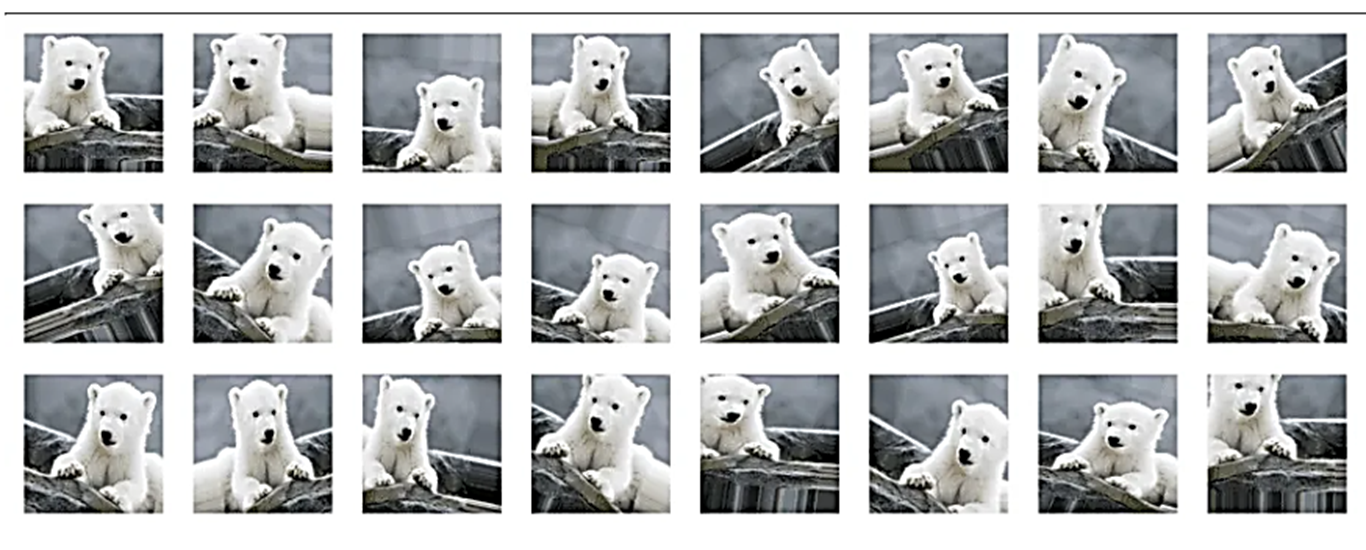

-------------------------------
#2. train_datagen

    train_datagen = ImageDataGenerator(rescale=1/255.)

This instance of ImageDataGenerator is used to create a generator for training images without any augmentation.

The only preprocessing step here is:

##rescale=1/255.:

This normalizes the image pixel values, just like in the augmented generator.

However, no other transformations like rotation, flipping, etc., are applied.

This is useful when you want to train a model on the original dataset without introducing any artificial variations.

-----------------------------

#3. test_datagen

    test_datagen = ImageDataGenerator(rescale=1/255.)

This ImageDataGenerator is used to preprocess the test images. Like the non-augmented training generator, it only rescales the pixel values:

##rescale=1/255.:

This normalizes the pixel values of the test images between 0 and 1.

Since test data should represent the real-world data the model will see after deployment, it is important to avoid any augmentation (like rotation, flipping, etc.) in the test set.

Therefore, this generator only resizes and rescales the images without applying any further transformations.

------------------------
#Summary
train_datagen_augmented: Used for generating augmented training data with various transformations like rotation, zoom, flip, etc.

This helps the model generalize better by seeing slightly modified versions of the training images.

##train_datagen:

Used for generating training data without any augmentation. Only rescaling is done to normalize pixel values.

##test_datagen:

Used for generating test data, where only rescaling is done. No augmentation is applied to keep the test data as close to the original data as possible.

The use of data augmentation (train_datagen_augmented) generally leads to better model performance, especially when the dataset is small or when the model is prone to overfitting.

> 🤔 **Question:** What's data augmentation?

**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

> 🔑 **Note:** Data augmentation is usally only performed on the training data. Using the `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


Better than talk about data augmentation, how about we see it?

(remember our motto? visualize, visualize, visualize...)

In [ ]:
# Get data batch samples
images, labels = next(train_data) # Use next(train_data) instead of train_data.next()
augmented_images, augmented_labels = next(train_data_augmented) # Use next(train_data_augmented) instead of train_data_augmented.next()

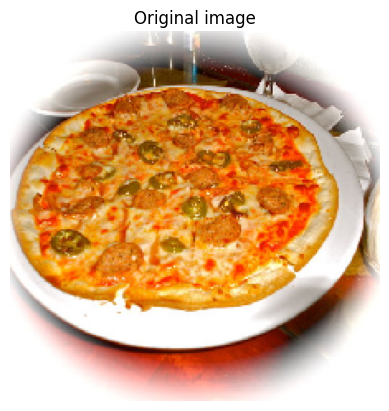

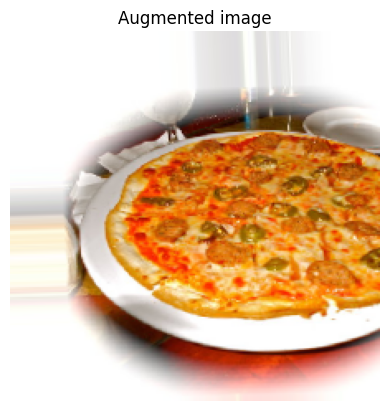

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

After going through a sample of original and augmented images, you can start to see some of the example transformations on the training images.

Notice how some of the augmented images look like slightly warped versions of the original image. This means our model will be forced to try and learn patterns in less-than-perfect images, which is often the case when using real-world images.

> 🤔 **Question:** Should I use data augmentation? And how much should I augment?

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

As for how much to data augment, there's no set practice for this. Best to check out the options in the `ImageDataGenerator` class and think about how a model in your use case might benefit from some data augmentation.

Now we've got augmented data, let's try and refit a model on it and see how it affects training.

We'll use the same model as `model_5`.

In [ ]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        # Set validation_steps to 1
                        # This will ensure that your validation data does not run out
                        validation_steps=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 383ms/step - accuracy: 0.3444 - loss: 0.7552 - val_accuracy: 0.6250 - val_loss: 0.6871
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4688 - val_loss: 0.6906
Epoch 3/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 356ms/step - accuracy: 0.5601 - loss: 0.6913 - val_accuracy: 0.6562 - val_loss: 0.6762
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6562 - val_loss: 0.6773
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 336ms/step - accuracy: 0.5226 - loss: 0.6913 - val_accuracy: 0.5625 - val_loss: 0.6420


# Explaining Max Pooling
The MaxPool2D(pool_size=2) layer in a Convolutional Neural Network (CNN) is used to reduce the spatial dimensions (height and width) of the feature maps produced by the previous convolutional layer.

This process is known as downsampling or subsampling.

-----------------------
#How Max Pooling Works
##Pooling Operation:

The MaxPool2D layer takes a window (a small square region) of the feature map and slides it over the entire feature map. Within each window, it selects the maximum value.

This maximum value represents the most important or dominant feature within that window, and it is used in the output feature map.

##pool_size=2:

This means that the window size is 2x2 pixels. For each 2x2 region of the input feature map, the layer will output the single maximum value.

The result is that the width and height of the feature map are both reduced by half.

--------------------
#For example:

If the input feature map is 224x224 pixels, after applying MaxPool2D(pool_size=2), the output will be 112x112 pixels.

If the input is 112x112, the output will be 56x56, and so on.

----------------
#Benefits of Max Pooling
##Dimensionality Reduction:

By reducing the size of the feature maps, max pooling decreases the number of parameters and computation in the network, making it more efficient.

##Translation Invariance:

Max pooling helps the model become more robust to small translations or shifts in the input image.

If an object in the image shifts slightly, the maximum value in each pooling window is likely to remain the same, which helps maintain the feature's integrity.

Focus on Important Features: By taking the maximum value in each window, max pooling emphasizes the most prominent features detected by the convolutional layers, reducing less important details.

#Example
Suppose you have a feature map (output of a Conv2D layer) that looks like this:

    [[1, 3, 2, 4],
     [5, 6, 1, 2],
     [7, 2, 8, 1],
     [4, 3, 6, 5]]

Applying MaxPool2D(pool_size=2) would break this into 2x2 regions and take the maximum value from each:

    [[6, 4],
     [7, 8]]

The output is a smaller feature map that still captures the most important features from the original map.

-----------------------------------------------------
Summary
Max Pooling with pool_size=2 reduces the size of the feature maps by half while retaining the most important information.
It helps control overfitting, reduces computation, and makes the model more translation invariant.







> 🤔 **Question:** Why didn't our model get very good results on the training set to begin with?

It's because when we created `train_data_augmented` we turned off data shuffling using `shuffle=False` which means our model only sees a batch of a single kind of images at a time.

For example, the pizza class gets loaded in first because it's the first class. Thus it's performance is measured on only a single class rather than both classes. The validation data performance improves steadily because it contains shuffled data.

Since we only set `shuffle=False` for demonstration purposes (so we could plot the same augmented and non-augmented image), we can fix this by setting `shuffle=True` on future data generators.

You may have also noticed each epoch taking longer when training with augmented data compared to when training with non-augmented data (~25s per epoch vs. ~10s per epoch).

This is because the `ImageDataGenerator` instance augments the data as it's loaded into the model. The benefit of this is that it leaves the original images unchanged. The downside is that it takes longer to load them in.

> 🔑 **Note:** One possible method to speed up dataset manipulation would be to look into [TensorFlow's parrallel reads and buffered prefecting options](https://www.tensorflow.org/tutorials/images/data_augmentation).

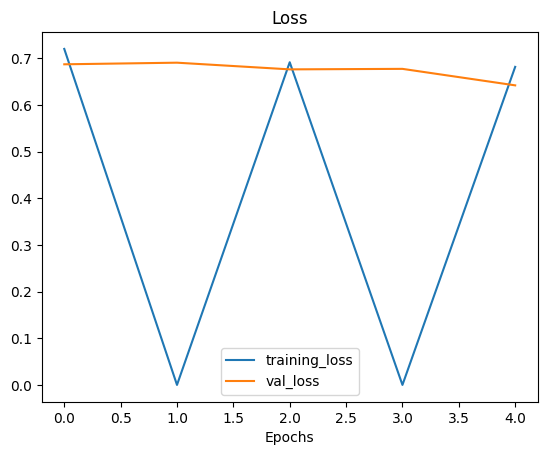

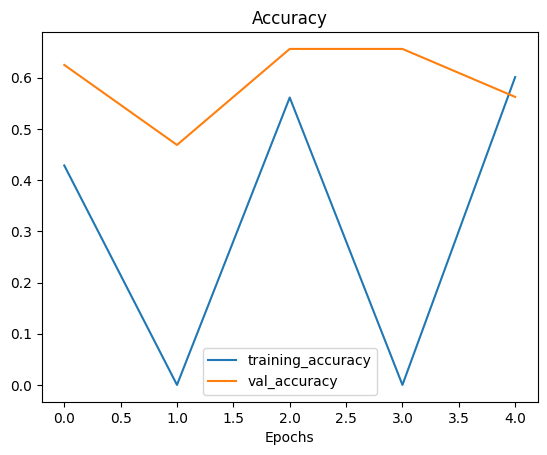

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

It seems our validation loss curve is heading in the right direction but it's a bit jumpy (the most ideal loss curve isn't too spiky but a smooth descent, however, a perfectly smooth loss curve is the equivalent of a fairytale).

Let's see what happens when we shuffle the augmented training data.

In [ ]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        # Set validation_steps to 1
                        # This will ensure that your validation data does not run out
                        validation_steps=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 352ms/step - accuracy: 0.5622 - loss: 0.6928 - val_accuracy: 0.5625 - val_loss: 0.6966
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 0.6410
Epoch 3/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 338ms/step - accuracy: 0.5216 - loss: 0.6941 - val_accuracy: 0.4688 - val_loss: 0.6923
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5312 - val_loss: 0.6889
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 365ms/step - accuracy: 0.5172 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6901


In [ ]:
# Print some samples from test_data
for data_batch, labels_batch in test_data:
  print("Data batch shape:", data_batch.shape)
  print("Labels batch shape:", labels_batch.shape)
  break  # Print only one batch

Data batch shape: (32, 224, 224, 3)
Labels batch shape: (32,)


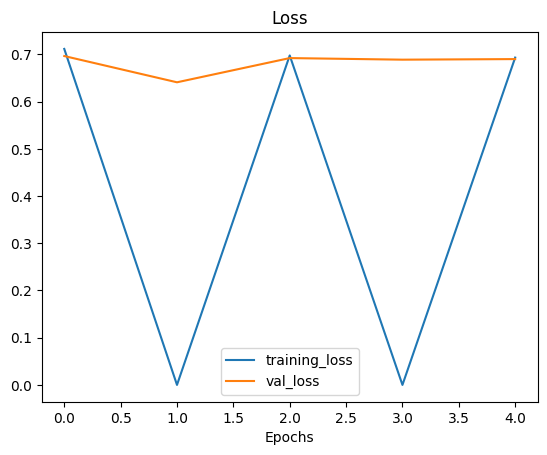

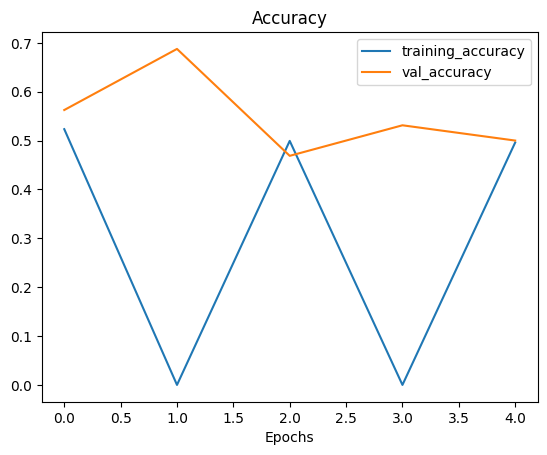

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

Notice with `model_7` how the performance on the training dataset improves almost immediately compared to `model_6`. This is because we shuffled the training data as we passed it to the model using the parameter `shuffle=True` in the `flow_from_directory` method.

This means the model was able to see examples of both pizza and steak images in each batch and in turn be evaluated on what it learned from both images rather than just one kind.

Also, our loss curves look a little bit smoother with shuffled data (comparing `history_6` to `history_7`).

# 7. Repeat until satisified

We've trained a few model's on our dataset already and so far they're performing pretty good.

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:
* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.

Adjusting each of these settings (except for the last two) during model development is usually referred to as **hyperparameter tuning**.

You can think of hyperparameter tuning as simialr to adjusting the settings on your oven to cook your favourite dish. Although your oven does most of the cooking for you, you can help it by tweaking the dials.

Let's go back to right where we started and try our original model (`model_1` or the TinyVGG architecture from [CNN explainer](https://poloclub.github.io/cnn-explainer/)).


> 🔑 **Note:** You might've noticed we used some slightly different code to build `model_8` as compared to `model_1`. This is because of the imports we did before, such as `from tensorflow.keras.layers import Conv2D` reduce the amount of code we had to write. Although the code is different, the architectures are the same.

In [9]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-08-26 17:59:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.207, 74.125.142.207, 74.125.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   240MB/s    in 0.4s    

2024-08-26 17:59:12 (240 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [10]:
!ls pizza_steak/train/

pizza  steak


In [11]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [12]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [13]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [14]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


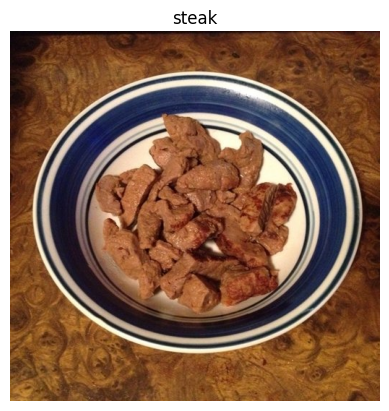

In [15]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [16]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from PIL import Image

# Set the seed
tf.random.set_seed(42)

# Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Print directory contents to check file presence
print("Contents of Train Directory:", os.listdir(train_dir))
print("Contents of Test Directory:", os.listdir(test_dir))

# Function to check and display an image
def check_image_validity(directory):
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            try:
                with Image.open(img_path) as img:
                    img.verify()  # Verify if the image is valid
            except (IOError, SyntaxError) as e:
                print(f"Corrupted image found: {img_path}, error: {e}")

# Check image validity
check_image_validity(train_dir)
check_image_validity(test_dir)

# Fit the model
history_8 = model_8.fit(train_data,
                        epochs=5,
                        validation_data=valid_data)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Contents of Train Directory: ['pizza', 'steak']
Contents of Test Directory: ['pizza', 'steak']


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 207ms/step - accuracy: 0.5594 - loss: 0.6947 - val_accuracy: 0.6500 - val_loss: 0.6329
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.7210 - loss: 0.5856 - val_accuracy: 0.7300 - val_loss: 0.5265
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.7753 - loss: 0.4769 - val_accuracy: 0.8140 - val_loss: 0.3957
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.8127 - loss: 0.4297 - val_accuracy: 0.8220 - val_loss: 0.3827
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - accuracy: 0.8186 - loss: 0.4086 - val_accuracy: 0.8100 - val_loss: 0.4219


In [17]:
# Check model_8 architecture (same as model_8)
model_8.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [18]:
# Check model_8 architecture (same as model_1)
model_8.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

Now let's check out our TinyVGG model's performance.

In [22]:
!pip install matplotlib

import matplotlib.pyplot as plt

# Define the plot_loss_curves function
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  !pip install matplotlib

import matplotlib.pyplot as plt

# Define the plot_loss_curves function
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.

    Args:
        history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.figure(figsize=(12, 6))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()



# Plotting Model_8 Loss and Accuracy over a No of Epochs


---
## Creating the Figure:

    plt.figure(figsize=(12, 6)) initializes a new figure with a specified size to hold the subplots.

###Subplot for Loss:

plt.subplot(1, 2, 1) specifies that there will be 1 row and 2 columns of subplots, and this line is defining the first subplot.

The plt.plot(epochs, loss, label='Training Loss') line plots the training loss over epochs.

plt.plot(epochs, val_loss, label='Validation Loss') plots the validation loss.

Titles, labels, and legends are used to make the plot informative.

-------------------------------------
##Subplot for Accuracy:

    plt.subplot(1, 2, 2) defines the second subplot.

The plt.plot(epochs, accuracy, label='Training Accuracy') line plots the training accuracy.

plt.plot(epochs, val_accuracy, label='Validation Accuracy') plots the validation accuracy.

Again, titles, labels, and legends are added.
Displaying the Plots:

-------------------------
##plt.show() finally renders the plots on the screen.


This code should correctly produce two plots: one showing the loss curves and one showing the accuracy curves across training epochs.

Make sure that you call the plot_loss_curves(history_8) function with the history object from your model training to see the plots.


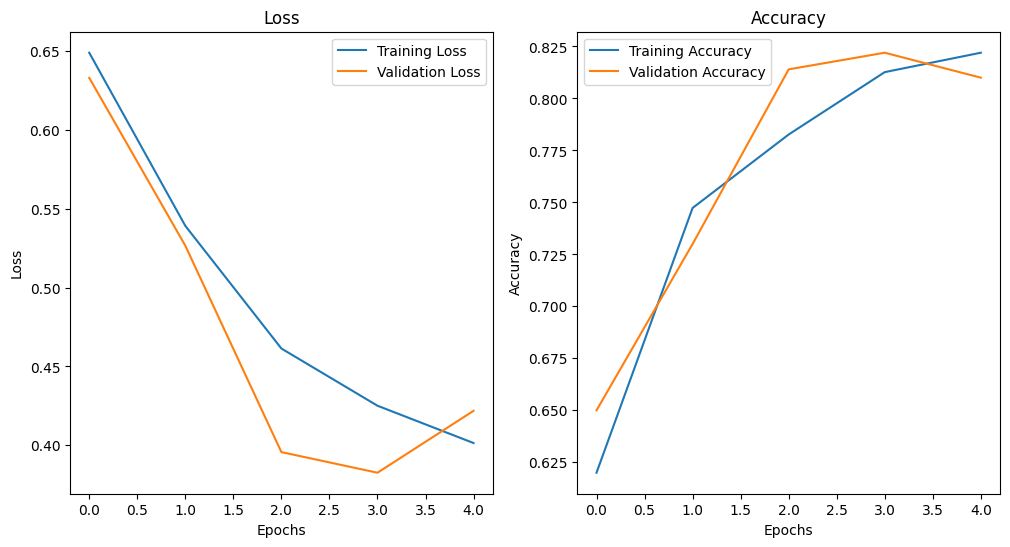

In [23]:
# How does this training curve look compared to the one above?
plot_loss_curves(history_8)

Hmm, our training curves are looking good, but our model's performance on the training and test sets didn't improve much compared to the previous model.

Taking another loook at the training curves, it looks like our model's performance might improve if we trained it a little longer (more epochs).

Perhaps that's something you like to try?

### Making a prediction with our trained model

What good is a trained model if you can't make predictions with it?

To really test it out, we'll upload a couple of our own images and see how the model goes.

First, let's remind ourselves of the classnames and view the image we're going to test on.

In [24]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


The first test image we're going to use is [a delicious steak](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg) I cooked the other day.

--2024-08-26 17:20:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.2’

03-steak.jpeg.2     100%[===================>]   1.89M  --.-KB/s    in 0.05s   

2024-08-26 17:20:59 (35.2 MB/s) - ‘03-steak.jpeg.2’ saved [1978213/1978213]



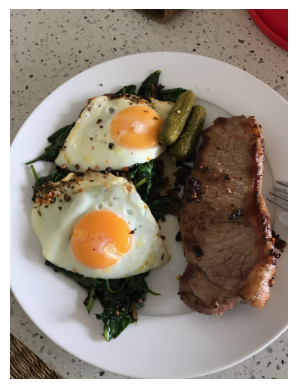

In [3]:
# Import the necessary libraries
import matplotlib.image as mpimg
import matplotlib.pyplot as plt # import the pyplot module from matplotlib

# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

# Download the Image

    !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

## !wget:

This is a shell command that downloads files from the web.

The exclamation mark (!) is used in Jupyter notebooks or similar environments to run shell commands.

The URL provided points to an image of a steak stored in a GitHub repository.

This command downloads the image and saves it locally with the name 03-steak.jpeg.

----------------------
##3. Load the Image

    steak = mpimg.imread("03-steak.jpeg")

###mpimg.imread():

This function reads the image file and converts it into an array of pixel values, which can then be processed or displayed. The result is stored in the variable steak.

-----------------------
##4. Display the Image

    plt.imshow(steak)

###plt.imshow():

This function displays the image array as an actual image.

It uses the pixel values to render the image on the screen.

-----------------------------
##5. Remove the Axis

###plt.axis(False);
plt.axis(False): This removes the axis lines, ticks, and labels from the plot, making the image display cleaner and without any surrounding frame or markers.

###; (Semicolon):

It suppresses the output of the last line in Jupyter notebooks, preventing unnecessary text output from appearing after the plot.

------------------
#Summary
This snippet downloads an image from the internet, reads it into Python as an array, and displays it using matplotlib.

The axis is removed for a cleaner presentation. The code is commonly used for quick image visualization in machine learning or data analysis tasks.

In [4]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

Since our model takes in images of shapes `(224, 224, 3)`, we've got to reshape our custom image to use it with our model.

To do so, we can import and decode our image using [`tf.io.read_file`](https://www.tensorflow.org/api_docs/python/tf/io/read_file) (for readining files) and [`tf.image`](https://www.tensorflow.org/api_docs/python/tf/image) (for resizing our image and turning it into a tensor).

> 🔑 **Note:** For your model to make predictions on unseen data, for example, your own custom images, the custom image has to be in the same shape as your model has been trained on. In more general terms, to make predictions on custom data it has to be in the same form that your model has been trained on.

In [5]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

# This function is designed to load an image from a file and preprocess it
This function is designed to load an image from a file, preprocess it by decoding, resizing, and rescaling, and then return the processed image as a tensor.

This is particularly useful when working with machine learning models that require input images of a specific size and format

-----------------------
# 1. Function Definition

    def load_and_prep_image(filename, img_shape=224):

##def load_and_prep_image(filename, img_shape=224)::

 This line defines a Python function called load_and_prep_image.


##filename:

This is the path to the image file that needs to be loaded and preprocessed.

##img_shape=224:

This is an optional argument with a default value of 224.

It specifies the target height and width of the image after resizing.

If no value is provided, the image will be resized to 224x224 pixels.

----------------------
#2. Read the Image File

    img = tf.io.read_file(filename)

##tf.io.read_file(filename):

This TensorFlow function reads the image file from the specified filename and returns its raw content as a tensor (a multi-dimensional array).

---------------------------
#3. Decode the Image and Ensure 3 Color Channels

    img = tf.image.decode_image(img, channels=3)

##tf.image.decode_image(img, channels=3):

This function decodes the raw content of the image into a tensor that represents the image data.

##channels=3:

Ensures that the image has exactly three color channels (Red, Green, Blue), which is the standard for RGB images.

This is important because some images might have an additional alpha channel (transparency), and models are usually trained on RGB images.

---------------------------------
#4. Resize the Image

    img = tf.image.resize(img, size=[img_shape, img_shape])

##tf.image.resize(img, size=[img_shape, img_shape]):

This resizes the image to the specified dimensions (img_shape x img_shape).

The default value for img_shape is 224, so the image is resized to 224x224 pixels.

This step is crucial because machine learning models often require a fixed input size.

-------------------------------
#5. Rescale the Image

    img = img / 255

##img = img / 255.:

This rescales the pixel values of the image from their original range of 0 to 255 to a new range of 0 to 1.

Rescaling is a common preprocessing step in machine learning because it can help models converge faster and perform better by normalizing the input data.

--------------------------------
#6. Return the Preprocessed Image

    return img
##return img:

Finally, the function returns the preprocessed image, which is now a tensor that has been resized and rescaled, making it ready for input into a machine learning model.

--------------------------
#Summary
This function is designed to load an image from a file, preprocess it by decoding, resizing, and rescaling, and then return the processed image as a tensor.

This is particularly useful when working with machine learning models that require input images of a specific size and format.

Now we've got a function to load our custom image, let's load it in.

In [7]:
!pip install tensorflow

import tensorflow as tf # imports the tensorflow module

# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [8]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

Wonderful, our image is in tensor format, time to try it with our model!

In [26]:
# Make a prediction on our custom image
# Reshape steak to have a batch size of 1
steak = tf.expand_dims(steak, axis=0)
model_8.predict(steak)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


array([[0.95431125]], dtype=float32)

# There's one more problem...

# Although our image is in the same shape as the images our model has been trained on, we're still missing a dimension.

Remember how our model was trained in batches?

Well, the batch size becomes the first dimension.

So in reality, our model was trained on data in the shape of `(batch_size, 224, 224, 3)`.

We can fix this by adding an extra to our custom image tensor using [`tf.expand_dims`](https://www.tensorflow.org/api_docs/python/tf/expand_dims).

In [27]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (1, 224, 224, 3)
Shape after new dimension: (1, 1, 224, 224, 3)


<tf.Tensor: shape=(1, 1, 224, 224, 3), dtype=float32, numpy=
array([[[[[0.6377451 , 0.6220588 , 0.57892156],
          [0.6504902 , 0.63186276, 0.5897059 ],
          [0.63186276, 0.60833335, 0.5612745 ],
          ...,
          [0.52156866, 0.05098039, 0.09019608],
          [0.49509802, 0.04215686, 0.07058824],
          [0.52843136, 0.07745098, 0.10490196]],

         [[0.6617647 , 0.6460784 , 0.6107843 ],
          [0.6387255 , 0.6230392 , 0.57598037],
          [0.65588236, 0.63235295, 0.5852941 ],
          ...,
          [0.5352941 , 0.06862745, 0.09215686],
          [0.529902  , 0.05931373, 0.09460784],
          [0.5142157 , 0.05539216, 0.08676471]],

         [[0.6519608 , 0.6362745 , 0.5892157 ],
          [0.6392157 , 0.6137255 , 0.56764704],
          [0.65637255, 0.6269608 , 0.5828431 ],
          ...,
          [0.53137255, 0.06470589, 0.08039216],
          [0.527451  , 0.06862745, 0.1       ],
          [0.52254903, 0.05196078, 0.0872549 ]],

         ...,

         

# Creating Multiple Shape Dimensions
----------------
## 1. Understanding Tensor Shapes
Tensors in TensorFlow are multi-dimensional arrays (similar to numpy arrays), and the shape of a tensor indicates the number of elements along each dimension.

For image data, a common shape is (height, width, channels), where:
height and width are the dimensions of the image.

Channels is the number of color channels (e.g., 3 for RGB images).

-------------------
##2. Initial Shape of the Image Tensor
When you load an image using TensorFlow, the shape of the tensor representing the image might be something like (224, 224, 3) (for a 224x224 RGB image).

This shape is fine for representing a single image, but if you want to feed it into a model that expects a batch of images, you need to include a batch dimension.

----------------------------------
##3. Adding a Batch Dimension
Machine learning models (especially in TensorFlow and Keras) typically expect input data to have a batch dimension as the first dimension.

For example, the expected shape for a batch of images is often (batch_size, height, width, channels).

If you only have one image and want to make it compatible with a model that expects a batch of images, you need to add an extra dimension to indicate that this is a batch containing a single image.

--------------------------
##4. Using tf.expand_dims
tf.expand_dims(tensor, axis=0) adds a new dimension at the specified axis.

In this case, axis=0 adds the new dimension at the start, converting the shape from (224, 224, 3) to (1, 224, 224, 3).

This new shape indicates that you have a batch containing a single image.

-------------------------------
##5. Alternative Syntax
The line steak = steak[tf.newaxis, ...] is an alternative way of adding a new dimension at the start.

tf.newaxis is a convenient alias for None that can be used to insert a new axis into a tensor.

The ... (ellipsis) is shorthand for "all other dimensions," so this syntax also results in a shape of (1, 224, 224, 3).

-------------------------------------
#6. Why Do This?
Model Compatibility: If you're feeding the image into a model that expects a batch input (e.g., during inference or training), adding this extra dimension makes the image tensor compatible.

Consistency: Even if you only have one image, treating it as a batch of one ensures consistency in data handling across different scenarios (e.g., when you have more than one image).

---------------------------------------------
#Example Explanation

# Print the shape before adding a new dimension

print(f"Shape before new dimension: {steak.shape}")  # Output: (224, 224, 3)

# Add a new dimension to make the shape compatible with model input

steak = tf.expand_dims(steak, axis=0)  # Now the shape is (1, 224, 224, 3)

# Alternative method to add a new dimension at the beginning

steak = steak[tf.newaxis, ...]  # Equivalent to the above, resulting in shape (1, 224, 224, 3)

# Print the shape after adding a new dimension

print(f"Shape after new dimension: {steak.shape}")  # Output: (1, 224, 224, 3)

-------------------------------
#Summary
Why Add a New Dimension? To make a single image compatible with a model that expects a batch of images as input.

How? By using tf.expand_dims() or tf.newaxis, you add a batch dimension to the tensor, making it a batch of one image.

Our custom image has a batch size of 1! Let's make a prediction on it.

Ahh, the predictions come out in **prediction probability** form. In other words, this means how likely the image is to be one class or another.

Since we're working with a binary classification problem, if the prediction probability is over 0.5, according to the model, the prediction is most likely to be the **postive class** (class 1).

And if the prediction probability is under 0.5, according to the model, the predicted class is most likely to be the **negative class** (class 0).

> 🔑 **Note:** The 0.5 cutoff can be adjusted to your liking. For example, you could set the limit to be 0.8 and over for the positive class and 0.2 for the negative class. However, doing this will almost always change your model's performance metrics so be sure to make sure they change in the right direction.

But saying positive and negative class doesn't make much sense when we're working with pizza 🍕 and steak 🥩...

So let's write a little function to convert predictions into their class names and then plot the target image.

In [3]:
# Assign a list to the class_names variable
class_names = ["steak", "not steak"]

# Remind ourselves of our class names
class_names

['steak', 'not steak']

In [8]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [11]:
# Import the TensorFlow module
import tensorflow as tf

# Assign a list to the class_names variable
class_names = ["steak", "not steak"]

# You'll need to define pred
pred = tf.constant([0.8]) # Example prediction probability

# We can index the predicted class by rounding the prediction probability
# Access the first element of the tensor directly
pred_class = class_names[int(tf.round(pred)[0])]
pred_class

'not steak'

In [ ]:
# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg", class_names)

Nice! Our model got the prediction right.

The only downside of working with food is this is making me hungry.

Let's try one more image.

In [ ]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

Two thumbs up! Woohoo!

## Multi-class Classification

We've referenced the TinyVGG architecture from the CNN Explainer website multiple times through this notebook, however, the CNN Explainer website works with 10 different image classes, where as our current model only works with two classes (pizza and steak).

> 🛠 **Practice:** Before scrolling down, how do you think we might change our model to work with 10 classes of the same kind of images? Assume the data is in the same style as our two class problem.

Remember the steps we took before to build our pizza 🍕 vs. steak 🥩 classifier?

How about we go through those steps again, except this time, we'll work with 10 different types of food.

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/misc-tensorflow-workflow-outline.png)
*The workflow we're about to go through is a slightly modified version of the above image. As you keep going through deep learning problems, you'll find the workflow above is more of an outline than a step-by-step guide.*

### 1. Import and become one with the data

Again, we've got a subset of the [Food101 dataset](https://www.kaggle.com/dansbecker/food-101). In addition to the pizza and steak images, we've pulled out another eight classes.


In [ ]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

Now let's check out all of the different directories and sub-directories in the `10_food_classes` file.

In [ ]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

Looking good!

We'll now setup the training and test directory paths.

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

And get the class names from the subdirectories.

In [ ]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

How about we visualize an image from the training set?

In [ ]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

### 2. Preprocess the data (prepare it for a model)

After going through a handful of images (it's good to visualize at least 10-100 different examples), it looks like our data directories are setup correctly.

Time to preprocess the data.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

As with binary classifcation, we've creator image generators. The main change this time is that we've changed the `class_mode` parameter to `'categorical'` because we're dealing with 10 classes of food images.

Everything else like rescaling the images, creating the batch size and target image size stay the same.

> 🤔 **Question:** Why is the image size 224x224? This could actually be any size we wanted, however, 224x224 is a very common size for preprocessing images to. Depending on your problem you might want to use larger or smaller images.

### 3. Create a model (start with a baseline)

We can use the same model (TinyVGG) we used for the binary classification problem for our multi-class classification problem with a couple of small tweaks.

Namely:
* Changing the output layer to use have 10 ouput neurons (the same number as the number of classes we have).
* Changing the output layer to use `'softmax'` activation instead of `'sigmoid'` activation.
* Changing the loss function to be `'categorical_crossentropy'` instead of `'binary_crossentropy'`.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### 4. Fit a model

Now we've got a model suited for working with multiple classes, let's fit it to our data.

In [ ]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Why do you think each epoch takes longer than when working with only two classes of images?

It's because we're now dealing with more images than we were before. We've got 10 classes with 750 training images and 250 validation images each totalling 10,000 images. Where as when we had two classes, we had 1500 training images and 500 validation images, totalling 2000.

The intuitive reasoning here is the more data you have, the longer a model will take to find patterns.

### 5. Evaluate the model

Woohoo! We've just trained a model on 10 different classes of food images, let's see how it went.

In [ ]:
# Evaluate on the test data
model_9.evaluate(test_data)

In [ ]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_9)

Woah, that's quite the gap between the training and validation loss curves.

What does this tell us?

It seems our model is **overfitting** the training set quite badly. In other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test data.

### 6. Adjust the model parameters

Due to its performance on the training data, it's clear our model is learning something. However, performing well on the training data is like going well in the classroom but failing to use your skills in real life.

Ideally, we'd like our model to perform as well on the test data as it does on the training data.

So our next steps will be to try and prevent our model overfitting. A couple of ways to prevent overfitting include:

- **Get more data** - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
- **Simplify model** - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
- **Use data augmentation** - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
- **Use transfer learning** - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.

> 🔑 **Note:** Preventing overfitting is also referred to as **regularization**.

If you've already got an existing dataset, you're probably most likely to try one or a combination of the last three above options first.

Since collecting more data would involve us manually taking more images of food, let's try the ones we can do from right within the notebook.

How about we simplify our model first?

To do so, we'll remove two of the convolutional layers, taking the total number of convolutional layers from four to two.

In [ ]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

In [ ]:
# Check out the loss curves of model_10
plot_loss_curves(history_10)

Hmm... even with a simplifed model, it looks like our model is still dramatically overfitting the training data.

What else could we try?

How about **data augmentation**?

Data augmentation makes it harder for the model to learn on the training data and in turn, hopefully making the patterns it learns more generalizable to unseen data.

To create augmented data, we'll recreate a new [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) instance, this time adding some parameters such as `rotation_range` and `horizontal_flip` to manipulate our images.

In [ ]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Now we've got augmented data, let's see how it works with the same model as before (`model_10`).

Rather than rewrite the model from scratch, we can clone it using a handy function in TensorFlow called [`clone_model`](https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model) which can take an existing model and rebuild it in the same format.

The cloned version will not include any of the weights (patterns) the original model has learned. So when we train it, it'll be like training a model from scratch.

> 🔑 **Note:** One of the key practices in deep learning and machine learning in general is to **be a serial experimenter**. That's what we're doing here. Trying something, seeing if it works, then trying something else. A good experiment setup also keeps track of the things you change, for example, that's why we're using the same model as before but with different data. The model stays the same but the data changes, this will let us know if augmented training data has any influence over performance.

In [ ]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

You can see it each epoch takes longer than the previous model. This is because our data is being augmented on the fly on the CPU as it gets loaded onto the GPU, in turn, increasing the amount of time between each epoch.

> **Note:** One way to improve this time taken is to use augmentation layers directly as part of the model. For example, with [`tf.keras.layers.RandomFlip`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomFlip). You can also speed up data loading with the newer [`tf.keras.utils.image_dataset_from_directory`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory) image loading API (we cover this later in the course).

How do our model's training curves look?

In [ ]:
# Check out our model's performance with augmented data
plot_loss_curves(history_11)

Woah! That's looking much better, the loss curves are much closer to eachother. Although our model didn't perform as well on the augmented training set, it performed much better on the validation dataset.

It even looks like if we kept it training for longer (more epochs) the evaluation metrics might continue to improve.

### 7. Repeat until satisfied

We could keep going here. Restructuring our model's architecture, adding more layers, trying it out, adjusting the learning rate, trying it out, trying different methods of data augmentation, training for longer. But as you could image, this could take a fairly long time.

Good thing there's still one trick we haven't tried yet and that's **transfer learning**.

However, we'll save that for the next notebook where you'll see how rather than design our own models from scratch we leverage the patterns another model has learned for our own task.

In the meantime, let's make a prediction with our trained multi-class model.

## Making a prediction with our trained model

What good is a model if you can't make predictions with it?

Let's first remind ourselves of the classes our multi-class model has been trained on and then we'll download some of own custom images to work with.

In [ ]:
# What classes has our model been trained on?
class_names

Beautiful, now let's get some of our custom images.

If you're using Google Colab, you could also upload some of your own images via the files tab.

In [ ]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

Okay, we've got some custom images to try, let's use the `pred_and_plot` function to make a prediction with `model_11` on one of the images and plot it.

In [ ]:
# Make a prediction using model_11
pred_and_plot(model=model_11,
              filename="03-steak.jpeg",
              class_names=class_names)

Hmm... it looks like our model got the prediction wrong, how about we try another?

In [ ]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

And again, it's predicting `chicken_curry` for some reason.

How about one more?

In [ ]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

`chicken_curry` again? There must be something wrong...

I think it might have to do with our `pred_and_plot` function.

Let's makes a prediction without using the function and see where it might be going wrong.

In [ ]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_11.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

Much better! There must be something up with our `pred_and_plot` function.

And I think I know what it is.

The `pred_and_plot` function was designed to be used with binary classification models where as our current model is a multi-class classification model.

The main difference lies in the output of the `predict` function.

In [ ]:
# Check the output of the predict function
pred = model_11.predict(tf.expand_dims(img, axis=0))
pred

Since our model has a `'softmax'` activation function and 10 output neurons, it outputs a prediction probability for each of the classes in our model.

The class with the highest probability is what the model believes the image contains.

We can find the maximum value index using [`argmax`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) and then use that to index our `class_names` list to output the predicted class.

In [ ]:
# Find the predicted class name
class_names[pred.argmax()]

Knowing this, we can readjust our `pred_and_plot` function to work with multiple classes as well as binary classes.

In [ ]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

Let's try it out. If we've done it right, using different images should lead to different outputs (rather than `chicken_curry` every time).

In [ ]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

In [ ]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

In [ ]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

In [ ]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

Our model's predictions aren't very good, this is because it's only performing at ~35% accuracy on the test dataset.

We'll see how to improve this later on (spolier: [transfer learning](https://dev.mrdbourke.com/tensorflow-deep-learning/04_transfer_learning_in_tensorflow_part_1_feature_extraction/) is going to step things up a notch).

## Saving and loading our model

Once you've trained a model, you probably want to be able to save it and load it somewhere else.

To do so, we can use the [`save`](https://www.tensorflow.org/tutorials/keras/save_and_load) and [`load_model`](https://www.tensorflow.org/tutorials/keras/save_and_load) functions.

In [ ]:
# Save a model
model_11.save("saved_trained_model")

In [ ]:
# Load in a model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

In [ ]:
# Compare our unsaved model's results (same as above)
model_11.evaluate(test_data)

## 🛠 Exercises

1. Spend 20-minutes reading and interacting with the [CNN explainer website](https://poloclub.github.io/cnn-explainer/).
 * What are the key terms? e.g. explain convolution in your own words, pooling in your own words

2. Play around with the "understanding hyperparameters" section in the [CNN explainer](https://poloclub.github.io/cnn-explainer/) website for 10-minutes.
  * What is the kernel size?
  * What is the stride?
  * How could you adjust each of these in TensorFlow code?

3. Take 10 photos of two different things and build your own CNN image classifier using the techniques we've built here.

4. Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset.

## 📖 Extra-curriculum

1. **Watch:** [MIT's Introduction to Deep Computer Vision](https://www.youtube.com/watch?v=iaSUYvmCekI&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=3) lecture. This will give you a great intuition behind convolutional neural networks.

2. **Watch:** Deep dive on [mini-batch gradient descent](https://youtu.be/-_4Zi8fCZO4) by deeplearning.ai. If you're still curious about why we use **batches** to train models, this technical overview covers many of the reasons why.

3. **Read:** [CS231n Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/convolutional-networks/) class notes. This will give a very deep understanding of what's going on behind the scenes of the convolutional neural network architectures we're writing.

4. **Read:** ["A guide to convolution arithmetic for deep learning"](https://arxiv.org/pdf/1603.07285.pdf). This paper goes through all of the mathematics running behind the scenes of our convolutional layers.

5. **Code practice:** [TensorFlow Data Augmentation Tutorial](https://www.tensorflow.org/tutorials/images/data_augmentation). For a more in-depth introduction on data augmentation with TensorFlow, spend an hour or two reading through this tutorial.